<a href="https://colab.research.google.com/github/Wuttikorn777/premier-league-assist-prediction/blob/main/CP462_Project_Predict_assists_per_game_of_Premier_League_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CP462 Project**
# หัวข้อ : **predict assists per game of Premier League players**
สมาชิก:
1) นายชยานนท์ จันทพันธ์  (ID : 66102010135 )
2) นายนายพสุนธรา แป้นไผ่ (ID : 66102010147 )
3) นายวุฒิกร จันทวิเศษ    (ID : 66102010246 )


# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [ ]:
# เปลี่ยน path ให้ตรงตำแหน่งไฟล์ของคุณ
file_path = '/content/drive/MyDrive/Datasci/epl_player_stats_24_25.csv'
df = pd.read_csv(file_path)

ดู 5 แถวแรก

In [ ]:
print(df.head())

     Player Name     Club Nationality Position  Appearances  Minutes  Goals  \
0      Ben White  Arsenal     England      DEF           17     1198      0   
1    Bukayo Saka  Arsenal     England      MID           25     1735      6   
2     David Raya  Arsenal       Spain      GKP           38     3420      0   
3    Declan Rice  Arsenal     England      MID           35     2833      4   
4  Ethan Nwaneri  Arsenal     England      MID           26      889      4   

   Assists  Shots  Shots On Target  ... Fouls  Yellow Cards  Red Cards  Saves  \
0        2      9               12  ...    10             2          0      0   
1       10     67                2  ...    15             3          0      0   
2        0      0                0  ...     1             3          0     86   
3        7     48               18  ...    21             5          1      0   
4        0     24                0  ...     9             1          0      0   

   Saves %  Penalties Saved  Clearance

ดู column + datatype

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

ดูสถิติ

In [ ]:
print(df.describe())

       Appearances      Minutes       Goals     Assists       Shots  \
count   562.000000   562.000000  562.000000  562.000000  562.000000   
mean     20.581851  1336.208185    1.713523    1.145907   17.526690   
std      12.136239  1055.099340    3.310674    2.197891   22.342341   
min       1.000000     1.000000    0.000000    0.000000    0.000000   
25%      10.000000   336.750000    0.000000    0.000000    1.000000   
50%      22.000000  1156.000000    0.000000    0.000000   10.000000   
75%      32.000000  2229.250000    2.000000    2.000000   25.000000   
max      38.000000  3420.000000   29.000000   18.000000  130.000000   

       Shots On Target  Big Chances Missed  Hit Woodwork    Offsides  \
count       562.000000          562.000000    562.000000  562.000000   
mean          5.514235            2.135231      0.496441    2.250890   
std           9.407054            3.732051      0.986986    4.085456   
min           0.000000            0.000000      0.000000    0.000000   


ดู missing value

In [ ]:
print(df.isnull().sum())

Player Name                  0
Club                         0
Nationality                  0
Position                     0
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Shots On Target              0
Conversion %                 0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes                       0
Successful Passes            0
Passes%                      0
Crosses                      0
Successful Crosses           0
Crosses %                    0
fThird Passes                0
Successful fThird Passes     0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Goal      0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0
Possession Won               0
Disposse

# Data Preparation / Data Wrangling


เช็กว่ามีคอลัมน์ไหนใน dataset ที่มีค่าว่าง

In [ ]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 Series([], dtype: int64)


ถ้ามีคอลัมน์ % ที่อยู่ในรูป string ให้แปลงเป็น numeric

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].str.contains('%').any():
        print(f'Before conversion in column "{col}":')
        print(df[col].head())  # ดูค่า 5 แถวแรกก่อนแปลง
        df[col] = df[col].str.rstrip('%').astype(float)
        print(f'After conversion in column "{col}":')
        print(df[col].head())  # ดูค่า 5 แถวแรกหลังแปลง


Before conversion in column "Conversion %":
0    13%
1    25%
2     0%
3    15%
4     0%
Name: Conversion %, dtype: object
After conversion in column "Conversion %":
0    13.0
1    25.0
2     0.0
3    15.0
4     0.0
Name: Conversion %, dtype: float64
Before conversion in column "Passes%":
0    89%
1    87%
2     0%
3    81%
4     0%
Name: Passes%, dtype: object
After conversion in column "Passes%":
0    89.0
1    87.0
2     0.0
3    81.0
4     0.0
Name: Passes%, dtype: float64
Before conversion in column "Crosses %":
0    20%
1     0%
2     0%
3    11%
4     0%
Name: Crosses %, dtype: object
After conversion in column "Crosses %":
0    20.0
1     0.0
2     0.0
3    11.0
4     0.0
Name: Crosses %, dtype: float64
Before conversion in column "fThird Passes %":
0    83%
1    60%
2     0%
3    76%
4     0%
Name: fThird Passes %, dtype: object
After conversion in column "fThird Passes %":
0    83.0
1    60.0
2     0.0
3    76.0
4     0.0
Name: fThird Passes %, dtype: float64
Before conversio

ลบแถวซ้ำ (ถ้ามี)

In [ ]:
df = df.drop_duplicates()

ถ้ามีคอลัมน์ที่มีค่าที่ผิดเพี้ยน เช่น นัดลงสนาม = 0 แต่มี assists เยอะ --> ตรวจ missing value

In [ ]:
# ตรวจสอบ Outlier เฉพาะเงื่อนไข: Minutes = 0 แต่ Assists > 0
weird_cases = df[(df['Appearances'] == 0) & (df['Assists'] > 0)]

# แสดงผล
if not weird_cases.empty:
    print("พบค่าผิดเพี้ยน (Appearances=0 แต่ Assists>0):")
    print(weird_cases[['Player Name','Club','Appearances','Assists']])
else:
    print("ไม่พบค่าผิดเพี้ยนตามเงื่อนไขที่กำหนด")

ไม่พบค่าผิดเพี้ยนตามเงื่อนไขที่กำหนด


ส่วนใหญ่ผู้เล่นลงเล่นกี่นัด

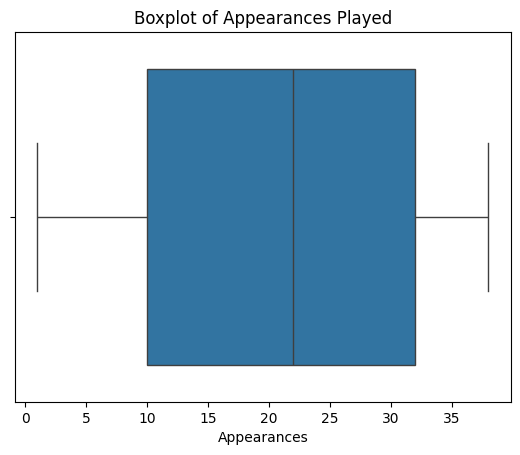

In [ ]:
sns.boxplot(x=df['Appearances'])
plt.title("Boxplot of Appearances Played")
plt.show()

bloxplot Appearances, Assists

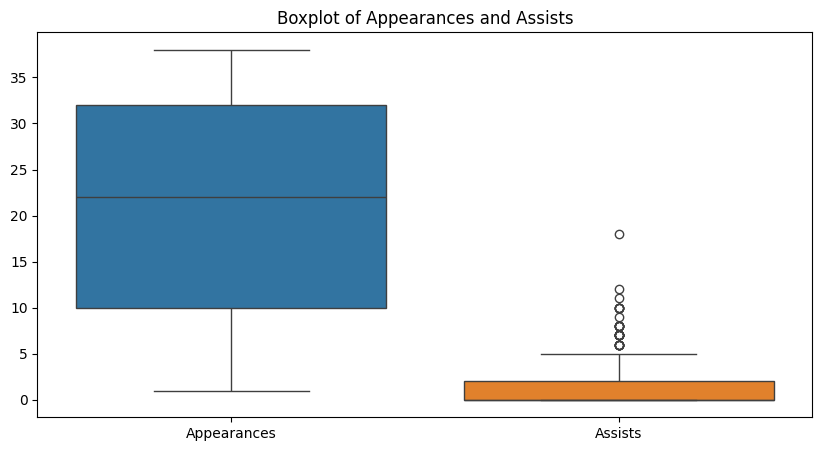

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Appearances", "Assists"]])
plt.title("Boxplot of Appearances and Assists")
plt.show()

ใช้ .replace() เพื่อแทนที่ชื่อทีม
inplace=True จะทำการแก้ไขใน DataFrame df โดยตรง

In [ ]:
df['Club'].replace('Brighton', 'Brighton & Hove Albion', inplace=True)

/tmp/ipython-input-456475048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club'].replace('Brighton', 'Brighton & Hove Albion', inplace=True)


ตรวจสอบผลลัพธ์ว่าชื่อทีมถูกเปลี่ยนแล้ว
จะแสดงข้อมูลของนักเตะในทีม Brighton

In [ ]:
print(df[df['Club'] == 'Brighton & Hove Albion'].head())

         Player Name                    Club  Nationality Position  \
109      Jakub Moder  Brighton & Hove Albion       Poland      MID   
110     James Milner  Brighton & Hove Albion      England      MID   
111     Adam Webster  Brighton & Hove Albion      England      DEF   
112  Bart Verbruggen  Brighton & Hove Albion  Netherlands      GKP   
113    Billy Gilmour  Brighton & Hove Albion     Scotland      MID   

     Appearances  Minutes  Goals  Assists  Shots  Shots On Target  ...  Fouls  \
109            4        9      0        0      0                0  ...      0   
110            4      173      0        0      2                0  ...      3   
111           14      888      0        0      5                0  ...      7   
112           36     3240      0        0      0                0  ...      0   
113            2       97      0        0      1                0  ...      2   

     Yellow Cards  Red Cards  Saves  Saves %  Penalties Saved  \
109             0          

# Explore Data Analysis (EDA)



คำนวณ Assists_per_Game

In [ ]:
df["Assists_per_Game"] = df.apply(
    lambda row: row["Assists"] / row["Appearances"] if row["Appearances"] > 0 else 0,
    axis=1
)

ค่าเฉลี่ยของ Assists ต่อเกม

In [ ]:
mean_apg = df["Assists_per_Game"].mean()
print(f"ค่าเฉลี่ยของ Assists ต่อเกม: {mean_apg:.2f}")

ค่าเฉลี่ยของ Assists ต่อเกม: 0.04


คำนวณ Z-score ของ Assists_per_Game

In [ ]:
df["Zscore_APG"] = stats.zscore(df["Assists_per_Game"])
print(df[["Player Name", "Club", "Assists_per_Game", "Zscore_APG"]])

         Player Name                     Club  Assists_per_Game  Zscore_APG
0          Ben White                  Arsenal          0.117647    1.153052
1        Bukayo Saka                  Arsenal          0.400000    5.288745
2         David Raya                  Arsenal          0.000000   -0.570154
3        Declan Rice                  Arsenal          0.200000    2.359296
4      Ethan Nwaneri                  Arsenal          0.000000   -0.570154
..               ...                      ...               ...         ...
557   Santiago Bueno  Wolverhampton Wanderers          0.000000   -0.570154
558         Tom King  Wolverhampton Wanderers          0.000000   -0.570154
559      Tommy Doyle  Wolverhampton Wanderers          0.041667    0.040148
560       Toti Gomes  Wolverhampton Wanderers          0.000000   -0.570154
561  Yerson Mosquera  Wolverhampton Wanderers          0.000000   -0.570154

[562 rows x 4 columns]


ระบุว่าเป็น Outlier หรือไม่ (ใช้เกณฑ์ |Z| > 3)

In [ ]:
df["Outlier_APG"] = df["Zscore_APG"].apply(lambda z: "Yes" if abs(z) > 3 else "No")

แสดงเฉพาะ Outliers

In [ ]:
outliers = df[df["Outlier_APG"] == "Yes"][["Player Name", "Club", "Assists_per_Game", "Zscore_APG", "Outlier_APG"]]
print("\n--- Outliers ---")
print(outliers)


--- Outliers ---
          Player Name               Club  Assists_per_Game  Zscore_APG  \
1         Bukayo Saka            Arsenal          0.400000    5.288745   
14    Martin Ødegaard            Arsenal          0.266667    3.335779   
45      Morgan Rogers        Aston Villa          0.270270    3.388562   
99   Mikkel Damsgaard          Brentford          0.263158    3.284385   
222  Antonee Robinson             Fulham          0.277778    3.498526   
324     Mohamed Salah          Liverpool          0.473684    6.368016   
343   Kevin De Bruyne    Manchester City          0.250000    3.091658   
357           Savinho    Manchester City          0.275862    3.470466   
367   Bruno Fernandes  Manchester United          0.277778    3.498526   
399      Jacob Murphy   Newcastle United          0.342857    4.451760   
415    Anthony Elanga  Nottingham Forest          0.289474    3.669839   
497     Son Heung-Min  Tottenham Hotspur          0.300000    3.824021   

    Outlier_APG  
1

เปลี่ยนชื่อฟังก์ชัน

In [ ]:
def explain_assists_per_game(value):
    if value == 0:
        return "ไม่สามารถตีความได้ (0 แอสซิสต์)"
    else:
        games_per_assist = round(1 / value, 2)
        return f"เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ {games_per_assist} เกม"

เพิ่มคอลัมน์คำอธิบาย

In [ ]:
df["APG_Interpretation"] = df["Assists_per_Game"].apply(explain_assists_per_game)

ตัวอย่าง 5 แถวแรก

In [ ]:
print("\n--- Interpretation of Assists per Game ---")
print(df[["Player Name", "Assists", "Appearances", "Assists_per_Game", "APG_Interpretation"]].head())


--- Interpretation of Assists per Game ---
     Player Name  Assists  Appearances  Assists_per_Game  \
0      Ben White        2           17          0.117647   
1    Bukayo Saka       10           25          0.400000   
2     David Raya        0           38          0.000000   
3    Declan Rice        7           35          0.200000   
4  Ethan Nwaneri        0           26          0.000000   

                        APG_Interpretation  
0  เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 8.5 เกม  
1  เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 2.5 เกม  
2          ไม่สามารถตีความได้ (0 แอสซิสต์)  
3  เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 5.0 เกม  
4          ไม่สามารถตีความได้ (0 แอสซิสต์)  


Descriptive Statistics

Skewness: 2.258520098938466
ข้อมูลมีลักษณะเบ้ขวา (Right Skewed / Positively Skewed)


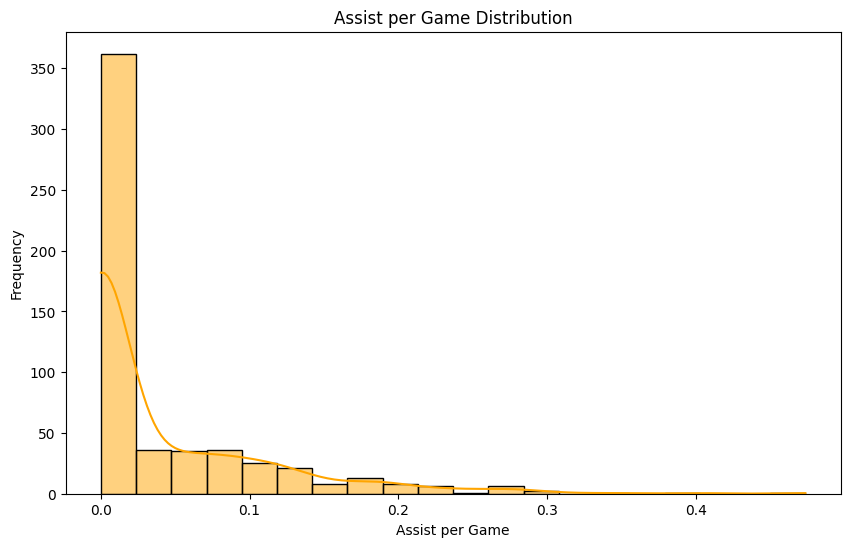

In [ ]:
# คำนวณ skewness
from scipy.stats import skew

skewness = skew(df["Assists_per_Game"].dropna())

print("Skewness:", skewness)
if skewness > 0:
    print("ข้อมูลมีลักษณะเบ้ขวา (Right Skewed / Positively Skewed)")
elif skewness < 0:
    print("ข้อมูลมีลักษณะเบ้ซ้าย (Left Skewed / Negatively Skewed)")
else:
    print("ข้อมูลสมมาตร (Symmetric)")

# วาด histogram
plt.figure(figsize=(10,6))
sns.histplot(df["Assists_per_Game"], bins=20, kde=True, color="orange")
plt.title("Assist per Game Distribution")
plt.xlabel("Assist per Game")
plt.ylabel("Frequency")
plt.show()

Distribution ของ Appearances, Assists

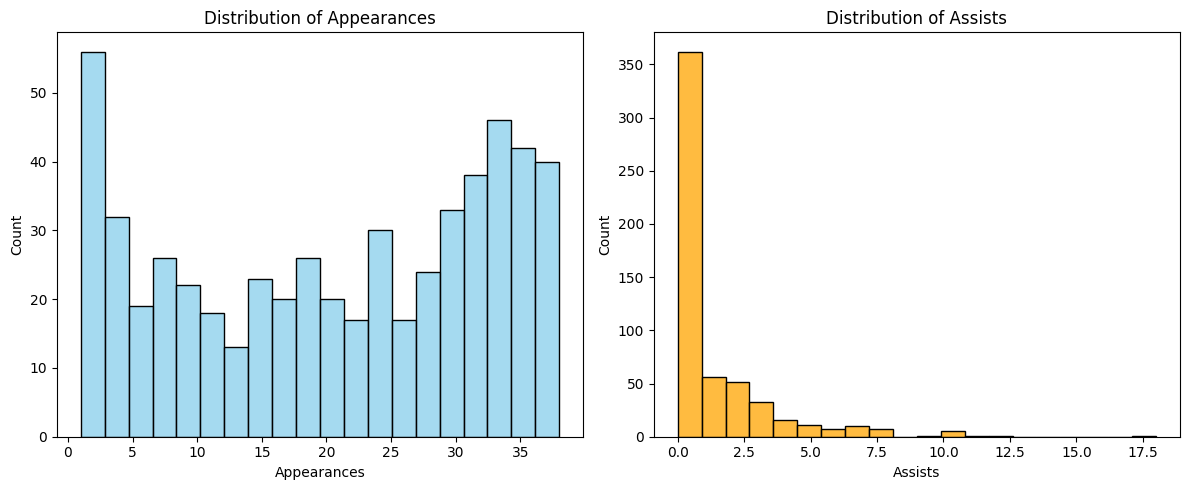

In [ ]:
# Distribution ของ Appearances และ Assists
plt.figure(figsize=(12,5))

# Distribution of Appearances
plt.subplot(1,2,1)
sns.histplot(df['Appearances'], bins=20, kde=False, color='skyblue')
plt.title("Distribution of Appearances")
plt.xlabel("Appearances")
plt.ylabel("Count")

# Distribution of Assists
plt.subplot(1,2,2)
sns.histplot(df['Assists'], bins=20, kde=False, color='orange')
plt.title("Distribution of Assists")
plt.xlabel("Assists")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Top performers: ผู้ทำการ assists สูงสุด 10 คน

/tmp/ipython-input-4013510036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assists', y='Player Name', data=top_assists, palette='magma')


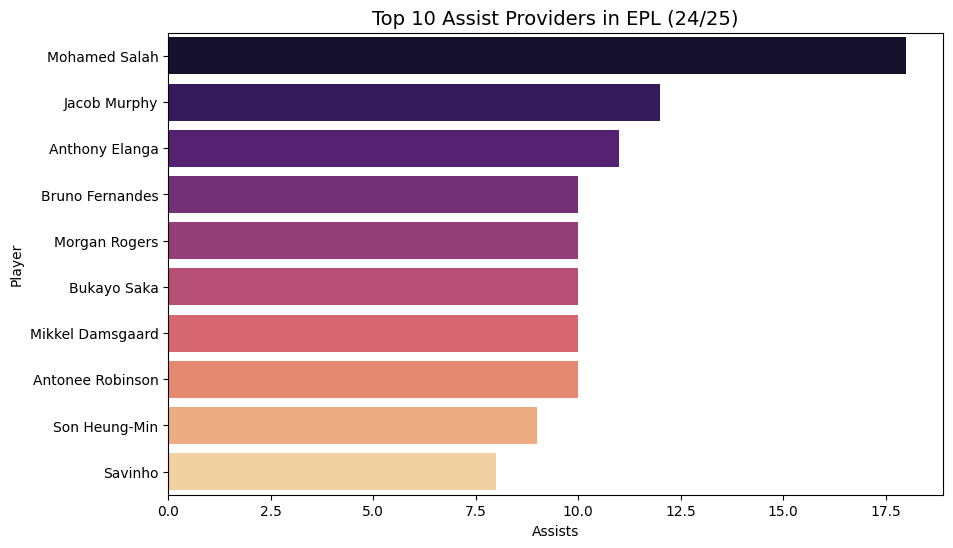

Player Name               Club  Assists
324     Mohamed Salah          Liverpool       18
399      Jacob Murphy   Newcastle United       12
415    Anthony Elanga  Nottingham Forest       11
367   Bruno Fernandes  Manchester United       10
45      Morgan Rogers        Aston Villa       10
1         Bukayo Saka            Arsenal       10
99   Mikkel Damsgaard          Brentford       10
222  Antonee Robinson             Fulham       10
497     Son Heung-Min  Tottenham Hotspur        9
357           Savinho    Manchester City        8

In [ ]:
top_assists = df.sort_values(by='Assists', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Assists', y='Player Name', data=top_assists, palette='magma')
plt.title("Top 10 Assist Providers in EPL (24/25)", fontsize=14)
plt.xlabel("Assists")
plt.ylabel("Player")
plt.show()

top_assists[['Player Name','Club','Assists']]

/tmp/ipython-input-1293699732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assists_per_Game', y='Player Name', data=top_assists, palette='magma')


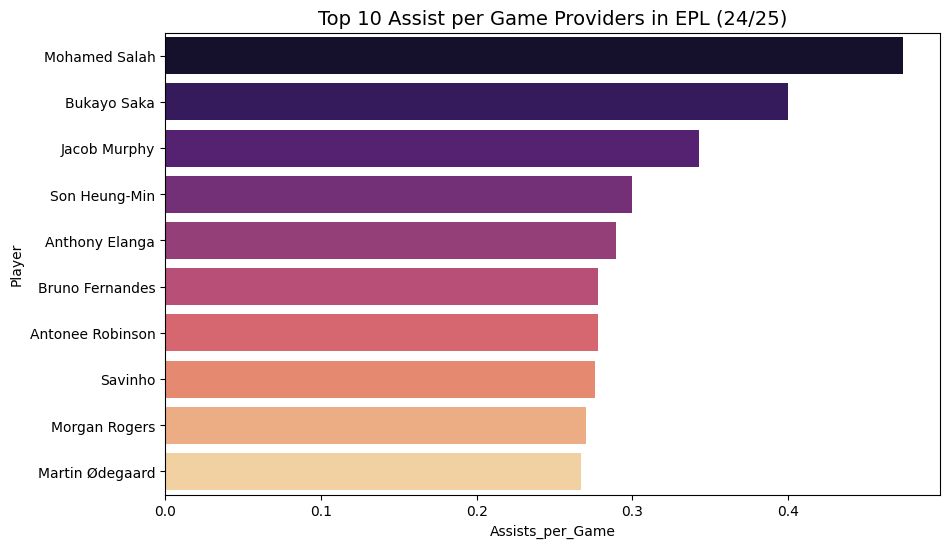

Player Name               Club  Assists_per_Game  Appearances  \
324     Mohamed Salah          Liverpool          0.473684           38   
1         Bukayo Saka            Arsenal          0.400000           25   
399      Jacob Murphy   Newcastle United          0.342857           35   
497     Son Heung-Min  Tottenham Hotspur          0.300000           30   
415    Anthony Elanga  Nottingham Forest          0.289474           38   
367   Bruno Fernandes  Manchester United          0.277778           36   
222  Antonee Robinson             Fulham          0.277778           36   
357           Savinho    Manchester City          0.275862           29   
45      Morgan Rogers        Aston Villa          0.270270           37   
14    Martin Ødegaard            Arsenal          0.266667           30   

     Assists  
324       18  
1         10  
399       12  
497        9  
415       11  
367       10  
222       10  
357        8  
45        10  
14         8

In [ ]:
top_assists = df.sort_values(by='Assists_per_Game', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Assists_per_Game', y='Player Name', data=top_assists, palette='magma')
plt.title("Top 10 Assist per Game Providers in EPL (24/25)", fontsize=14)
plt.xlabel("Assists_per_Game")
plt.ylabel("Player")
plt.show()

top_assists[['Player Name','Club','Assists_per_Game','Appearances' , 'Assists']]

ความสัมพันธ์ Appearances vs Assists

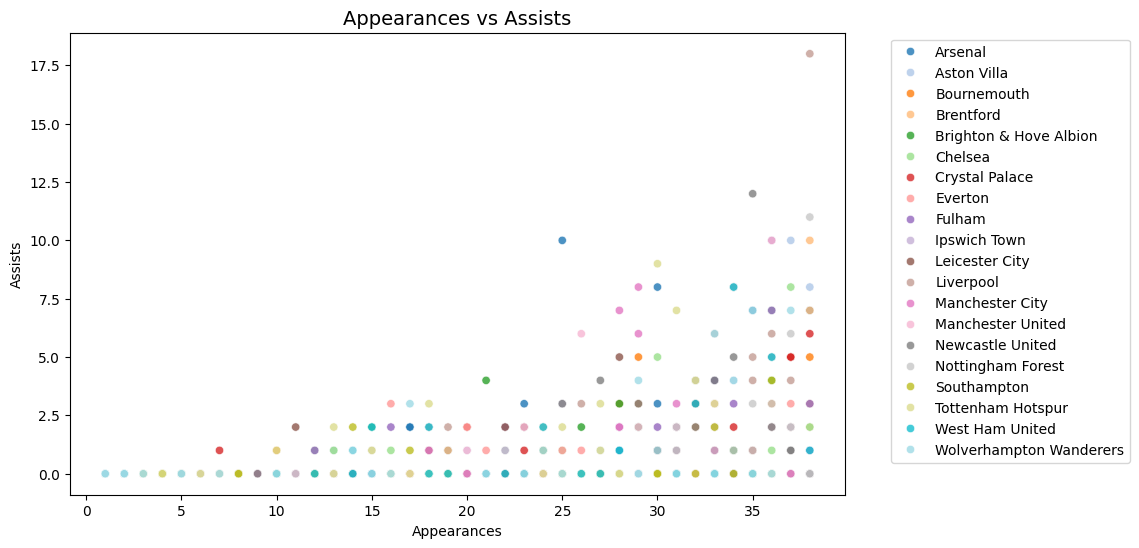

In [ ]:
plt.figure(figsize=(10,6))

# ใช้ palette ที่สีต่างกันชัด เช่น tab20 หรือ Set3
palette = sns.color_palette("tab20", n_colors=df['Club'].nunique())

sns.scatterplot(
    x='Appearances', y='Assists',
    data=df, hue='Club', alpha=0.8,
    palette=palette
)

plt.title("Appearances vs Assists", fontsize=14)
plt.xlabel("Appearances")
plt.ylabel("Assists")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


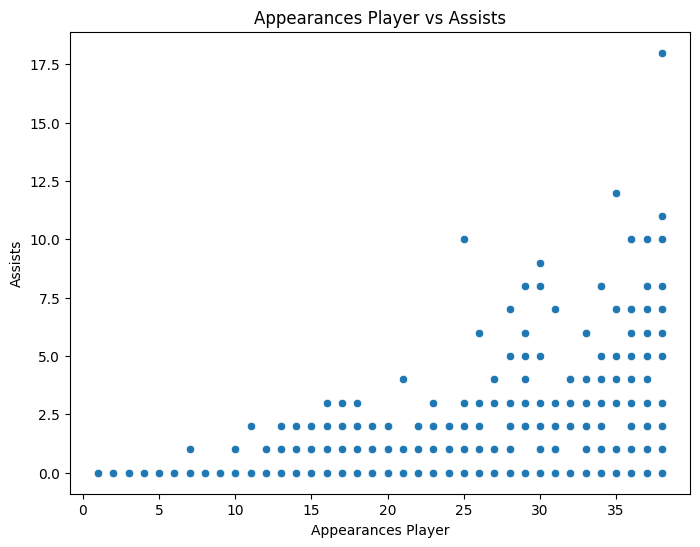

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Appearances', y='Assists', data=df)
plt.title("Appearances Player vs Assists")
plt.xlabel("Appearances Player")
plt.ylabel("Assists")
plt.show()

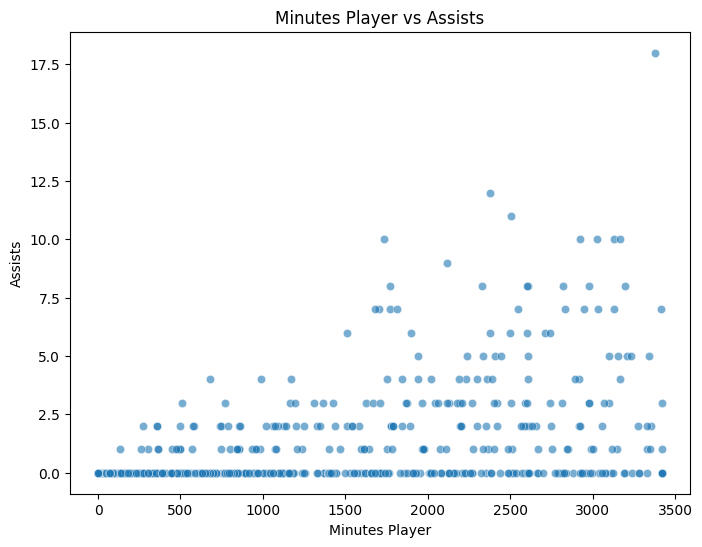

Correlation between Minutes Player and Assists: 0.45458368868427534


In [ ]:
# Scatter Plot: Minutes vs Assists
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Minutes"], y=df["Assists"], alpha=0.6)
plt.title("Minutes Player vs Assists")
plt.xlabel("Minutes Player")
plt.ylabel("Assists")
plt.show()

# คำนวณค่า Correlation
corr = df[["Minutes", "Assists"]].corr().iloc[0,1]
print("Correlation between Minutes Player and Assists:", corr)

ความสัมพันธ์ Successful Passes vs Assists

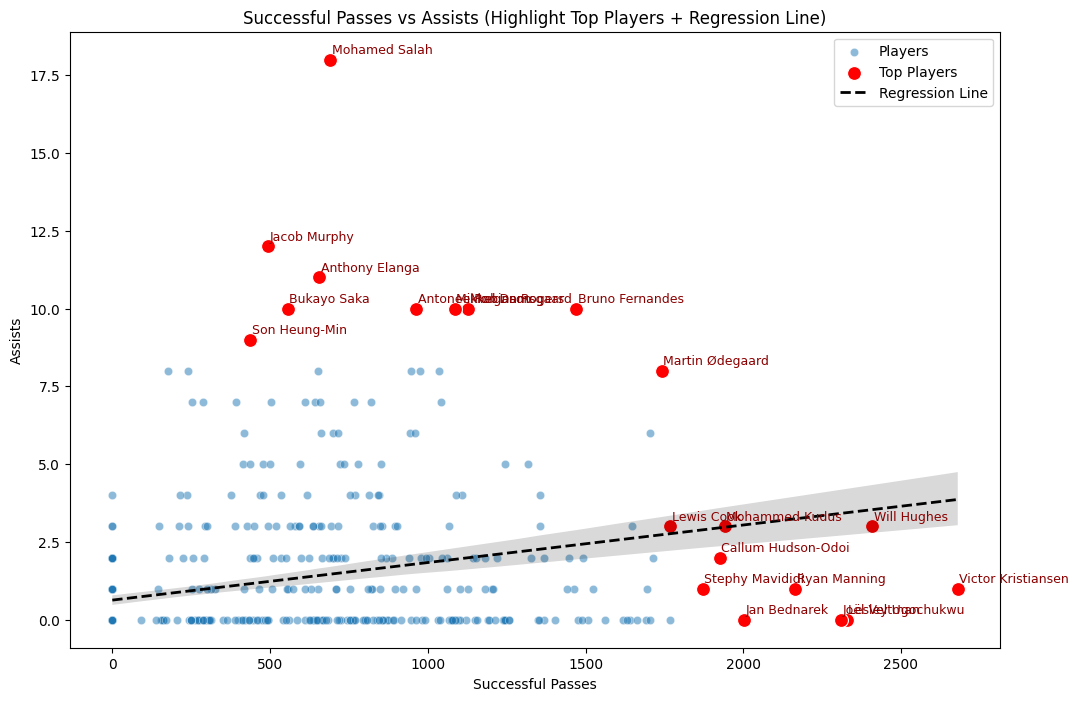

In [ ]:
# เตรียมข้อมูล
df_plot = df[["Player Name", "Successful Passes", "Assists"]].dropna()
df_plot["Successful Passes"] = pd.to_numeric(df_plot["Successful Passes"], errors="coerce")
df_plot["Assists"] = pd.to_numeric(df_plot["Assists"], errors="coerce")

# เลือก Top 10 ตาม Assists และ Top 10 ตาม Successful Passes
top_assists = df_plot.nlargest(10, "Assists")
top_passes = df_plot.nlargest(10, "Successful Passes")

# รวมสองกลุ่มเข้าด้วยกัน
highlight_players = pd.concat([top_assists, top_passes]).drop_duplicates()

# Plot
plt.figure(figsize=(12,8))

# Scatter ของผู้เล่นทั้งหมด
sns.scatterplot(x="Successful Passes", y="Assists",
                data=df_plot, alpha=0.5, label="Players")

# Scatter ของ top players
sns.scatterplot(x="Successful Passes", y="Assists",
                data=highlight_players, color="red", s=100, label="Top Players")

# Regression line
sns.regplot(x="Successful Passes", y="Assists", data=df_plot,
            scatter=False, color="black", line_kws={"linewidth":2, "linestyle":"--"},
            label="Regression Line")

# ใส่ชื่อผู้เล่น top
for i, row in highlight_players.iterrows():
    plt.text(row["Successful Passes"]+5,
             row["Assists"]+0.2,
             row["Player Name"],
             fontsize=9, color="darkred")

plt.title("Successful Passes vs Assists (Highlight Top Players + Regression Line)")
plt.xlabel("Successful Passes")
plt.ylabel("Assists")
plt.legend()
plt.show()

Heatmap correlation numeric features

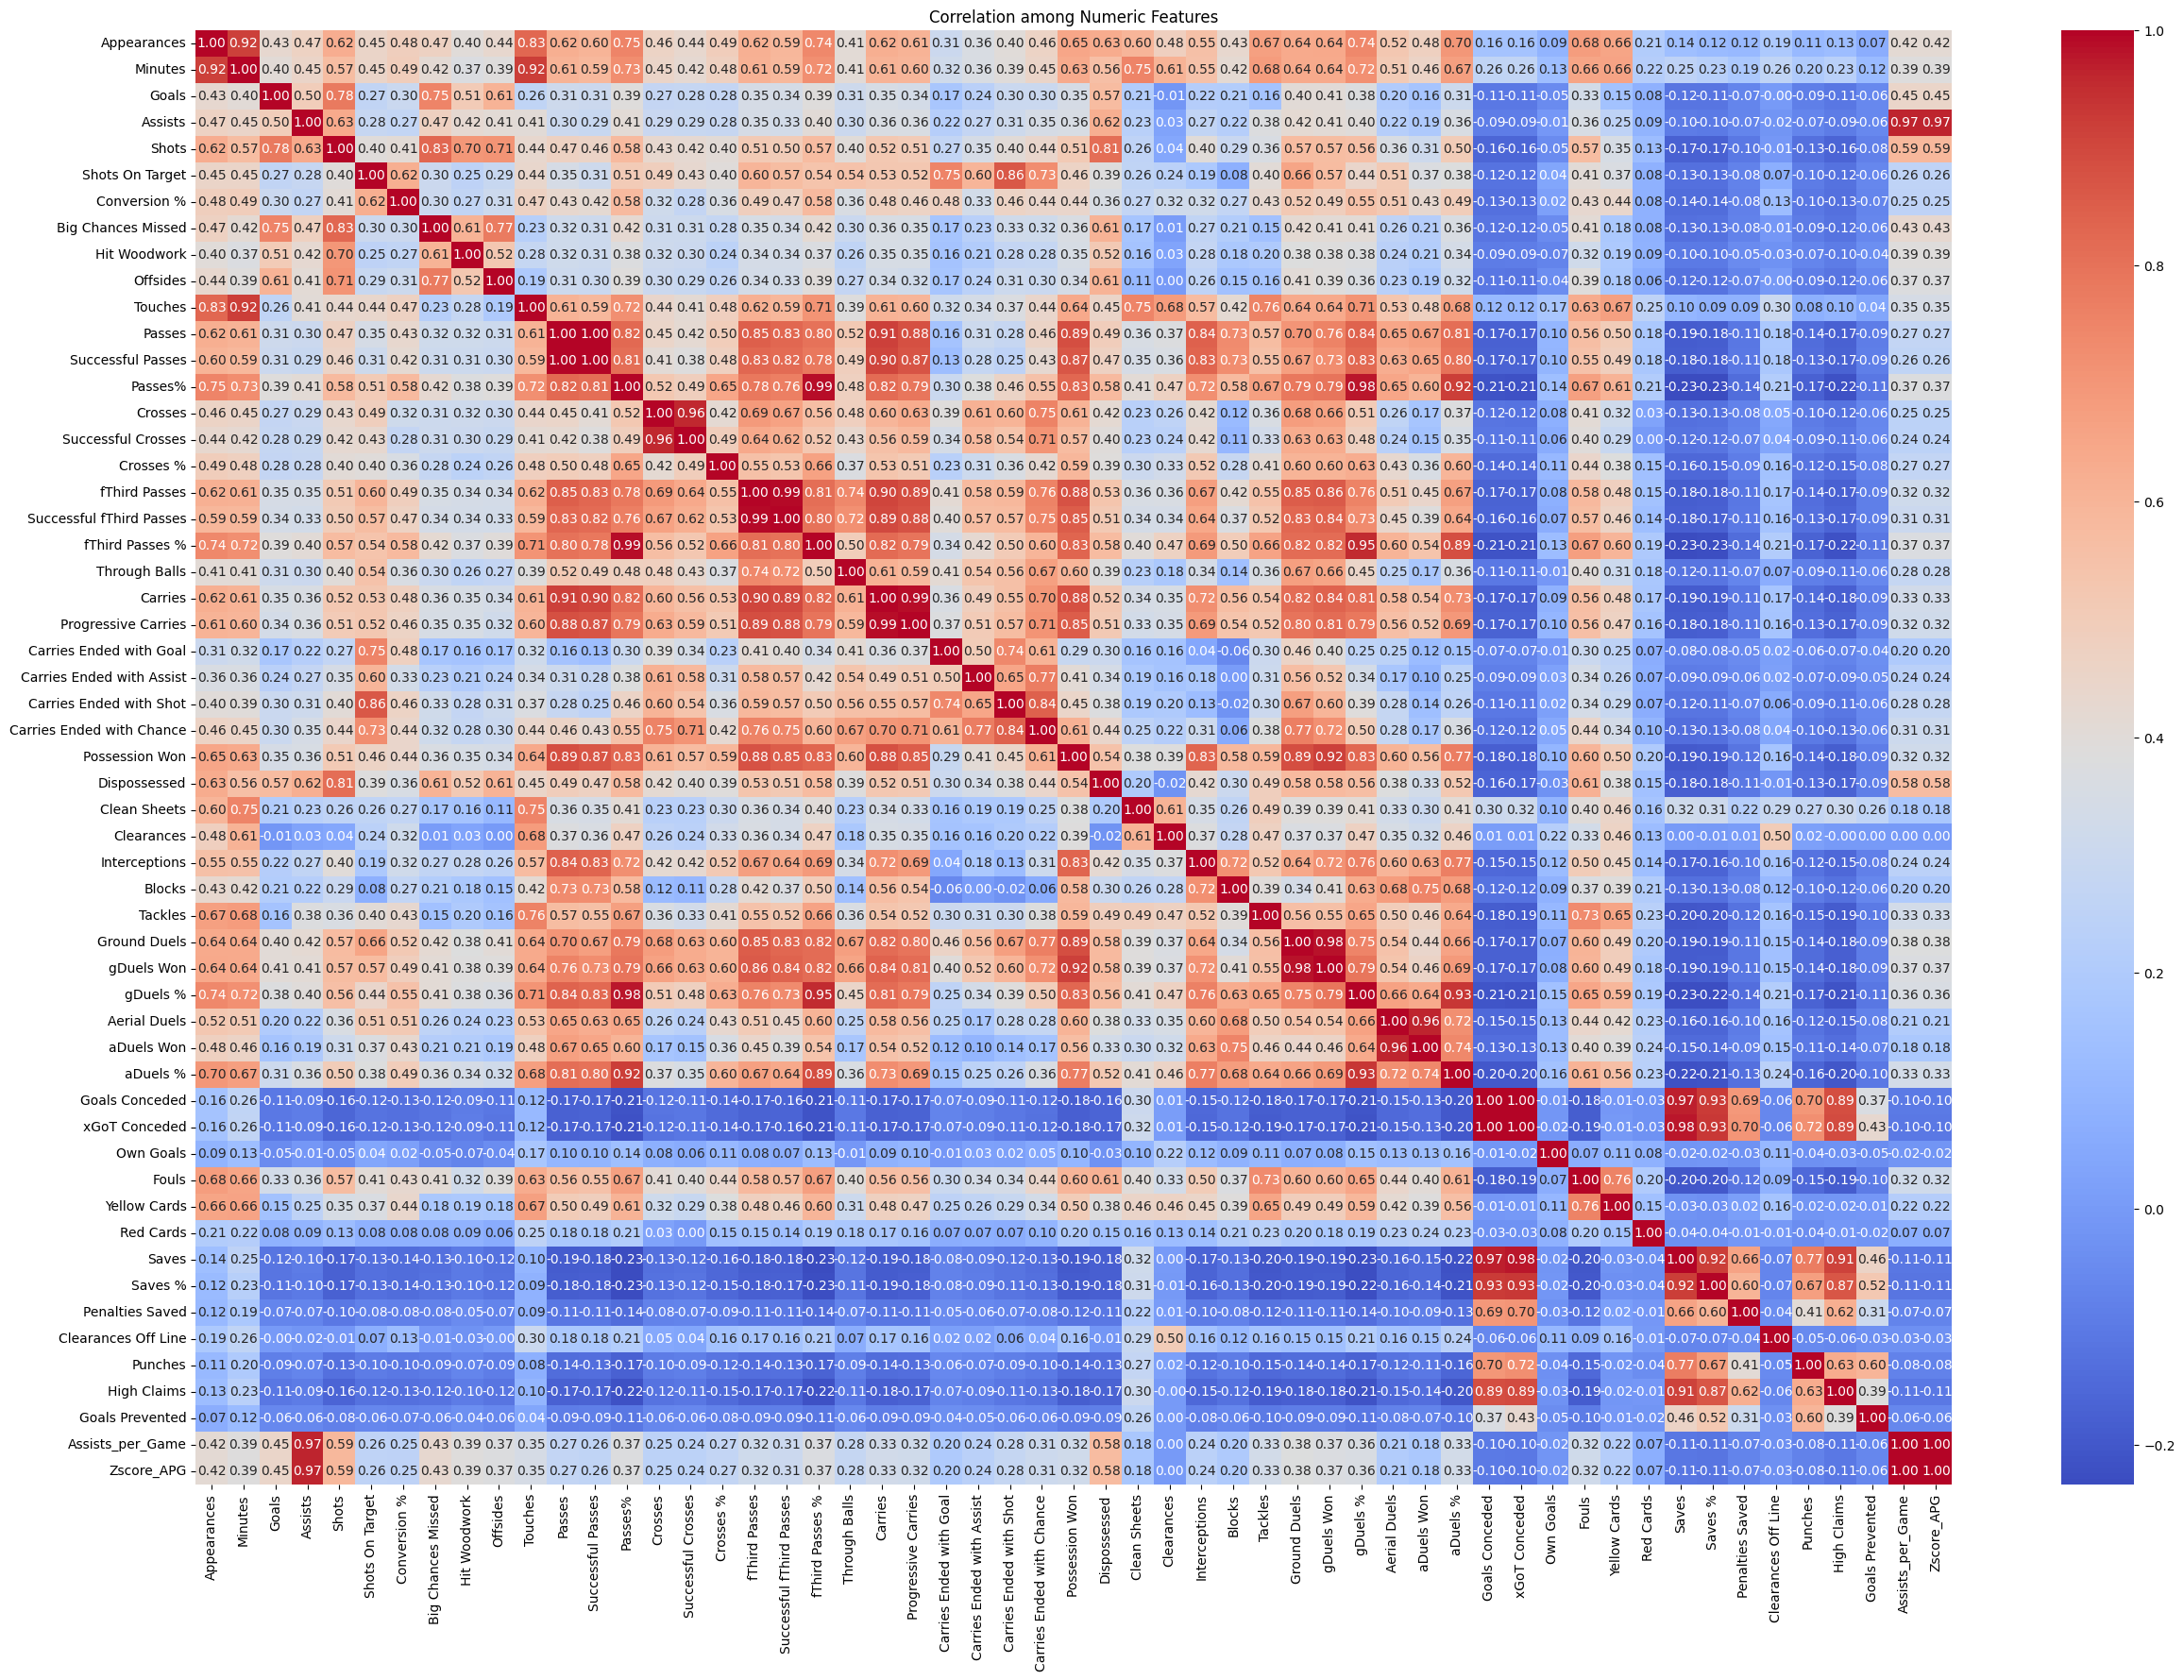

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(30,20))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation among Numeric Features")
plt.show()

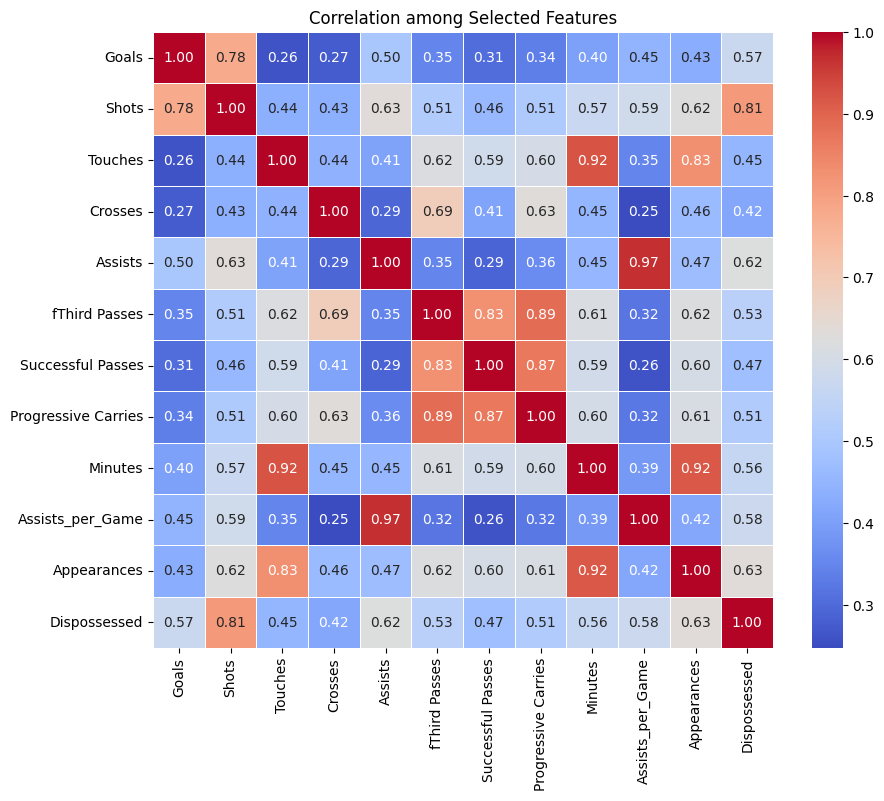

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# เลือกเฉพาะ 5 คอลัมน์
cols = ['Goals','Shots','Touches','Crosses','Assists','fThird Passes','Successful Passes','Progressive Carries','Minutes', 'Assists_per_Game','Appearances','Dispossessed']
numeric_df = df[cols]

# สร้าง Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation among Selected Features")
plt.show()


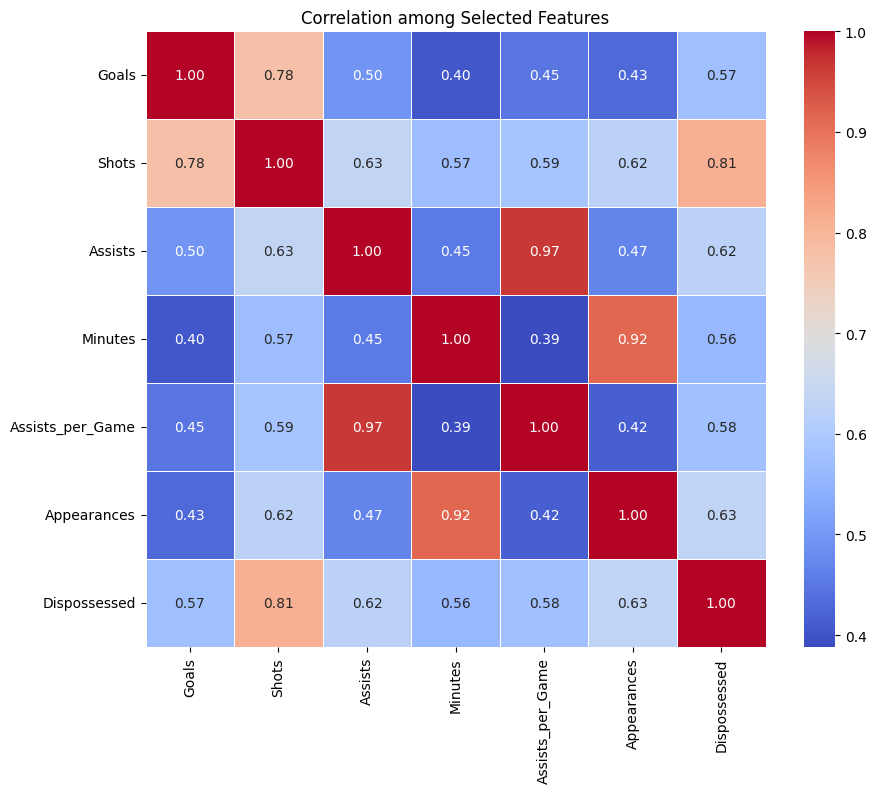

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# เลือกเฉพาะ 5 คอลัมน์
cols = ['Goals','Shots','Assists','Minutes', 'Assists_per_Game','Appearances','Dispossessed']
numeric_df = df[cols]

# สร้าง Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation among Selected Features")
plt.show()


Assists Touches minutes Sucessfulpass

In [ ]:
# นับจำนวนนักเตะในแต่ละสัญชาติ
nationality_counts = df['Nationality'].value_counts()

# แสดง 10 อันดับแรกของสัญชาติที่มีนักเตะมากที่สุด
top_10_nationalities = nationality_counts.head(10)

print("สัญชาติของนักเตะ 10 อันดับแรกที่มีจำนวนมากที่สุด:")
print(top_10_nationalities)

สัญชาติของนักเตะ 10 อันดับแรกที่มีจำนวนมากที่สุด:
Nationality
England        193
Brazil          34
France          25
Netherlands     22
Portugal        22
Spain           19
Denmark         18
Ireland         16
Argentina       14
Scotland        12
Name: count, dtype: int64


Average Assists per Game by Nationality:
   Nationality  Assists_per_Game
0    Argentina          0.051735
1       Brazil          0.028543
2      Denmark          0.028155
3      England          0.041522
4       France          0.023171
5      Ireland          0.013094
6  Netherlands          0.031371
7     Portugal          0.046317
8     Scotland          0.018425
9        Spain          0.026302


/tmp/ipython-input-1179176738.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nationality', y='Assists_per_Game', data=avg_assists_by_nationality, palette='viridis')


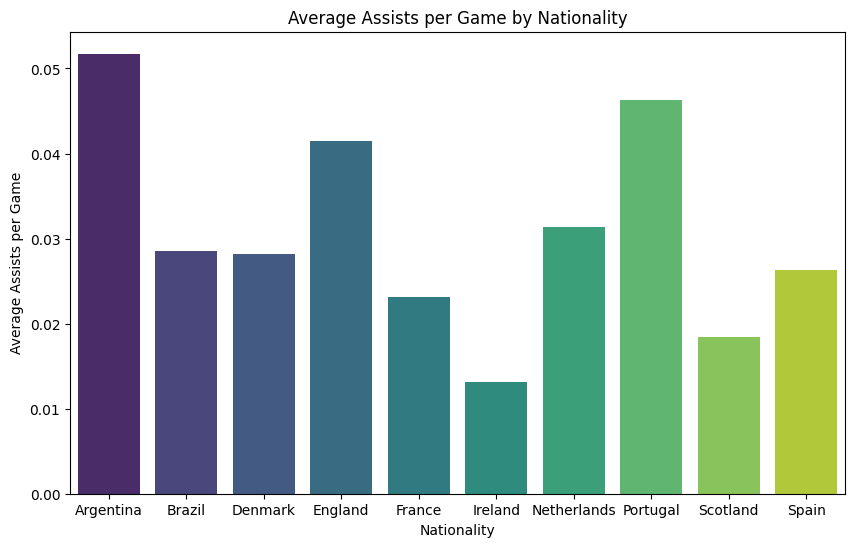


ANOVA Test Results: F-statistic=0.50, p-value=0.604
The differences in average A/G are NOT statistically significant.


In [ ]:
#2. Filter the data for the desired nationalities
nationalities = ['England', 'Spain', 'Portugal', 'Brazil' , 'France' , 'Netherlands' , 'Denmark' , 'Ireland' , 'Argentina' , 'Scotland' ]
df_filtered = df[df['Nationality'].isin(nationalities)].copy()

# 3. Calculate the average A/G for each nationality
avg_assists_by_nationality = df_filtered.groupby('Nationality')['Assists_per_Game'].mean().reset_index()

print("Average Assists per Game by Nationality:")
print(avg_assists_by_nationality)

# 4. Data Visualization to show the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='Assists_per_Game', data=avg_assists_by_nationality, palette='viridis')
plt.title('Average Assists per Game by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Assists per Game')
plt.show()

# 5. Statistical Test (ANOVA) to check for significant differences
from scipy.stats import f_oneway

# Extract A/G values for each nationality
england_apg = df_filtered[df_filtered['Nationality'] == 'England']['Assists_per_Game']
spain_apg = df_filtered[df_filtered['Nationality'] == 'Spain']['Assists_per_Game']
portugal_apg = df_filtered[df_filtered['Nationality'] == 'Portugal']['Assists_per_Game']

# Perform ANOVA test
f_stat, p_value = f_oneway(england_apg, spain_apg, portugal_apg)

print(f"\nANOVA Test Results: F-statistic={f_stat:.2f}, p-value={p_value:.3f}")
if p_value < 0.05:
    print("The differences in average A/G are statistically significant.")
else:
    print("The differences in average A/G are NOT statistically significant.")

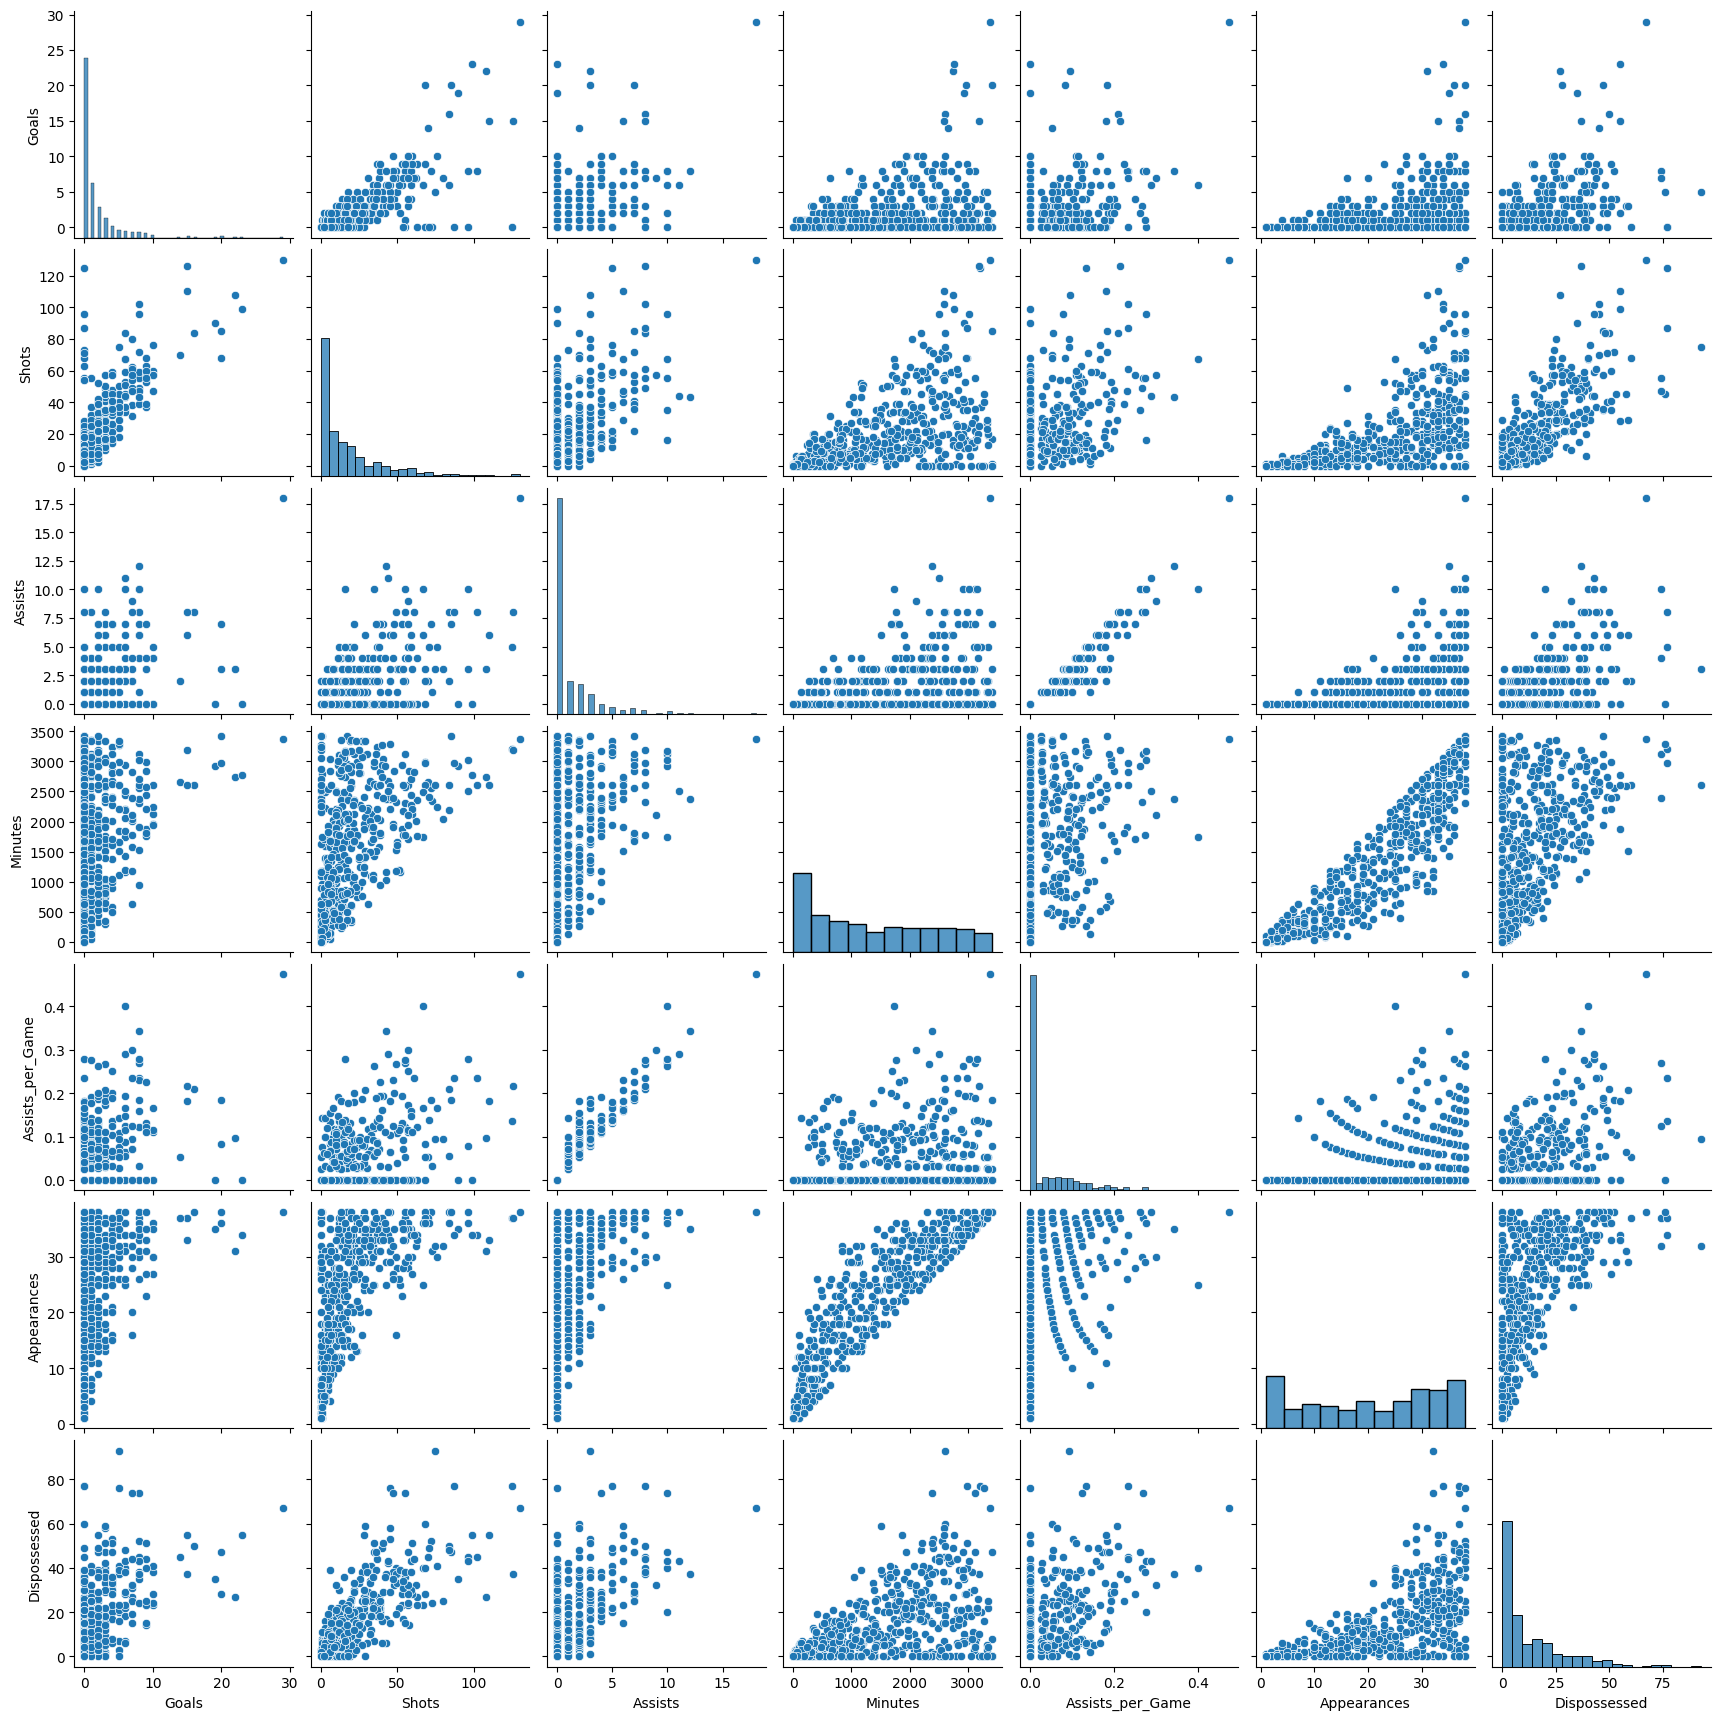

In [ ]:
#ใช้ Pairplot (Seaborn) แสดงความสัมพันธ์ของ Successful Passes , fThird Passes ,Through Balls , Touches , Carries , Progressive Carries, Goals ,Shots
sns.pairplot(df[['Goals','Shots','Assists','Minutes', 'Assists_per_Game','Appearances','Dispossessed']])
plt.show()

# Insight

Data Overview

*  ไม่มี missing values

*  ไม่มี แถวซ้ำ

*  มี Outlier

    * Goals (>15–30 ลูกในฤดูกาล)

    * Assists (>15 ครั้ง)

    * Minutes ไม่มีค่าผิดปกติ
Descriptive Statistics (Assists)

*  ค่าเฉลี่ย (Mean) = 1.15

* ค่ามัธยฐาน (Median) = 0

* ฐานนิยม (Mode) = 0

* การกระจายข้อมูล เบ้ขวา (skew = 2.82) → ผู้เล่นส่วนใหญ่ไม่มีแอสซิสต์ แต่มีบางคนที่จ่ายเยอะ

Multivariate Analysis (Correlation with Assists)

* ตัวแปรที่สัมพันธ์สูงสุดกับ Assists:

  * Shots (0.63)

  * Dispossessed (0.62)

  * Goals (0.50)

  * Big Chances Missed (0.47)

  * Appearances (0.47)

  * Minutes (0.45)

  * Hit Woodwork (0.42)

  * Ground Duels (0.42)

  * gDuels Won (0.41)

* ตัวแปรที่สัมพันธ์น้อยมาก เช่น Saves, Clearances, Yellow/Red Cards, Tackles → สามารถตัดออกจากโมเดลที่เน้นการทำนาย Assists

Pattern & Trend Detection (Assists)

* นักเตะที่ได้ลงสนามมาก (Appearances/Minutes สูง) มีโอกาสทำ Assists ได้มากกว่า → เวลาลงเล่นมาก = โอกาสจ่ายสำเร็จมากขึ้น

* ผู้เล่นที่มีจำนวน Shots เยอะ และมักถูก Dispossessed (เสียบอลบ่อย) มักจะเป็นตัวรุก → ซึ่งมีโอกาสสร้าง Assists ได้มากกว่า

* นักเตะที่ยิงประตูได้เยอะ (Goals สูง) ก็มักจะมีค่า Assists สูงตามไปด้วย → บ่งบอกว่าผู้เล่นแนวรุกมีบทบาททั้งยิงและจ่าย

* ค่า Big Chances Missed ที่สูง มีแนวโน้มเจอกับนักเตะที่ทำ Assists เยอะ → เพราะพวกเขามักเป็นคนสร้างโอกาสให้เพื่อนยิง

* ตำแหน่ง MID (กองกลาง) และ FWD (กองหน้า) มีโอกาสทำ Assists มากกว่ากองหลังหรือผู้รักษาประตู



# Summary Project Progress



สรุปขั้นตอนสำคัญของโปรเจกต์

*   **Data Loading**: โหลด dataset `epl_player_stats_24_25.csv` เข้ามาใน DataFrame
*   **Cleaning**: ตรวจสอบและจัดการกับ Missing Values และ Duplicate Rows (ไม่พบในข้อมูลนี้) มีการแปลงคอลัมน์ที่เป็นเปอร์เซ็นต์จาก string เป็น numeric
*   **Transforming**: ไม่ได้มีการแปลงค่า Feature ที่ซับซ้อนหรือทำการ Scaling ในขั้นตอนนี้
*   **Enriching**: สร้าง Feature ใหม่คือ `Assists_per_Game` และ `APG_Interpretation`
*   **Validating**: ไม่ได้มีการตรวจสอบคุณภาพข้อมูลอย่างเป็นทางการหลังการทำความสะอาด แต่ได้ตรวจสอบ Outlier ของ `Assists_per_Game` ด้วย Z-score
*   **Exploratory Data Analysis (EDA)**: วิเคราะห์ข้อมูลเพื่อหา Insight ต่างๆ เช่น Distribution ของ `Appearances` และ `Assists`, Top performers, ความสัมพันธ์ระหว่างตัวแปร (`Appearances` vs `Assists`, `Successful Passes` vs `Assists`), Heatmap correlation, และการวิเคราะห์ Assists per Game ตามสัญชาติ

ภาพรวมข้อมูล และการทำความสะอาด

Dataset `epl_player_stats_24_25.csv` ถูกโหลดเข้ามาและพบว่าค่อนข้างสะอาด **ไม่มี missing values** และ **ไม่มี duplicate rows** ในข้อมูลเริ่มต้น คอลัมน์ที่เป็นค่าเปอร์เซ็นต์ซึ่งอยู่ในรูปแบบ string ได้ถูกแปลงเป็น numeric เพื่อให้สามารถนำไปใช้ในการวิเคราะห์เชิงปริมาณได้ การตรวจสอบ outlier เบื้องต้นไม่พบกรณีที่ผิดปกติอย่างนักเตะที่มี assist แต่ไม่มีการลงเล่น อย่างไรก็ตาม มีการระบุ outlier ในคอลัมน์ `Assists_per_Game` โดยใช้ Z-score แต่ยังไม่ได้ทำการจัดการกับ outlier เหล่านี้ในขั้นตอนนี้ มีการสร้าง Feature ใหม่ `Assists_per_Game` เพื่อการวิเคราะห์ต่อยอดในเชิงประสิทธิภาพของผู้เล่น

#Dowload file


In [ ]:
output_file_path = '/content/drive/MyDrive/epl_player_stats_24_25_processed.csv'
df.to_csv(output_file_path, index=False)
print(f"DataFrame ถูกบันทึกเป็นไฟล์ CSV ที่: {output_file_path}")

DataFrame ถูกบันทึกเป็นไฟล์ CSV ที่: /content/drive/MyDrive/epl_player_stats_24_25_processed.csv


# **Data pre-processing**

In [ ]:
# ----------------------------
# 📦 Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# 🧹 Data Preprocessing
# ----------------------------

# 1. เลือกเฉพาะคอลัมน์ที่ใช้ในโมเดล
selected_cols = ['Goals','Shots','Assists','Minutes', 'Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# 2. แยก Features และ Target
X = df_model[['Goals','Shots','Assists','Minutes','Appearances','Dispossessed']]
y = df_model['Assists_per_Game']

# 3. แบ่ง Train/Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardize Data (ปรับ scale ให้แต่ละ feature อยู่ในช่วงเดียวกัน)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Build Machine Learning Model**

# Linear Regression

🎯 Linear Regression Results (Updated Features)
MAE: 0.0097
MSE: 0.0002
R² Score: 0.9450

📊 Coefficients:
        Feature  Coefficient
0         Goals    -0.001435
1         Shots     0.000101
2       Assists     0.071149
3       Minutes    -0.009451
4   Appearances     0.006317
5  Dispossessed    -0.001983


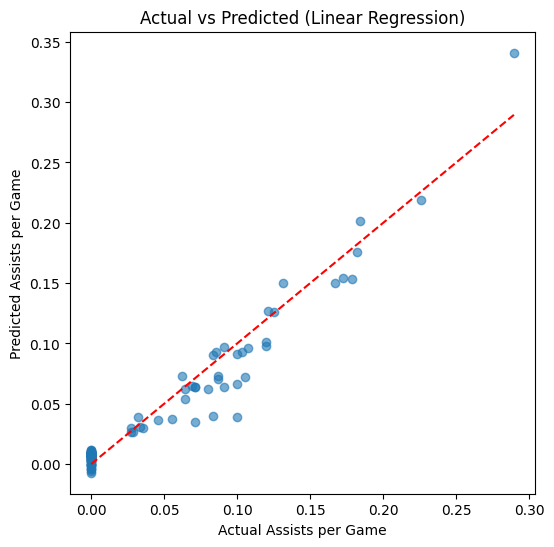

R² Train: 0.9347
R² Test: 0.9450


In [ ]:
# ----------------------------
# 🤖 Linear Regression Model
# ----------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ----------------------------
# 📈 Predict & Evaluate
# ----------------------------
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🎯 Linear Regression Results (Updated Features)")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ----------------------------
# 📊 Feature Coefficients
# ----------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n📊 Coefficients:")
print(coef_df)

# ----------------------------
# 📉 Visualization
# ----------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linestyle='--')
plt.show()

# ----------------------------
# 🧩 ตรวจสอบ Overfitting (เพิ่มเติม)
# ----------------------------
print(f"R² Train: {model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test: {model.score(X_test_scaled, y_test):.4f}")


In [ ]:
# ----------------------------
# 🔮 Prediction for New Player'Goals','Shots','Assists','Minutes','Appearances','Dispossessed'
# ----------------------------
new_player = pd.DataFrame({
    'Goals': [21],
    'Shots': [85],
    'Assists':[8],
    'Minutes':[3610],
    'Appearances': [38], # Corrected order
    'Dispossessed': [200]
})

new_player_scaled = scaler.transform(new_player)
predicted_apg = model.predict(new_player_scaled)

print("🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:")
print(f"Predicted Assists per Game: {predicted_apg[0]:.4f}")

if predicted_apg[0] == 0:
    print("ไม่สามารถตีความได้ (ค่าเฉลี่ย 0 แอสซิสต์ต่อเกม)")
else:
    games_per_assist = round(1 / predicted_apg[0], 2)
    print(f"เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ {games_per_assist} เกม")

🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:
Predicted Assists per Game: 0.2117
เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 4.72 เกม


#Linear Regression ไม่มี Assists

In [ ]:
# ----------------------------
# 📦 Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# 🧹 Data Preprocessing
# ----------------------------

# เลือกเฉพาะคอลัมน์ที่ใช้ในโมเดล
selected_cols = ['Goals','Shots','Minutes','Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# แยก Features และ Target
X = df_model[['Goals','Shots','Appearances','Dispossessed','Minutes']]
y = df_model['Assists_per_Game']

# แบ่ง Train/Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🎯 Linear Regression Results
Train MAE: 0.0369, MSE: 0.0032, R²: 0.3557
Test  MAE: 0.0291, MSE: 0.0018, R²: 0.4782

📊 Coefficients:
        Feature  Coefficient
0         Goals     0.001761
1         Shots     0.022305
2   Appearances    -0.003775
3  Dispossessed     0.019810
4       Minutes     0.005271


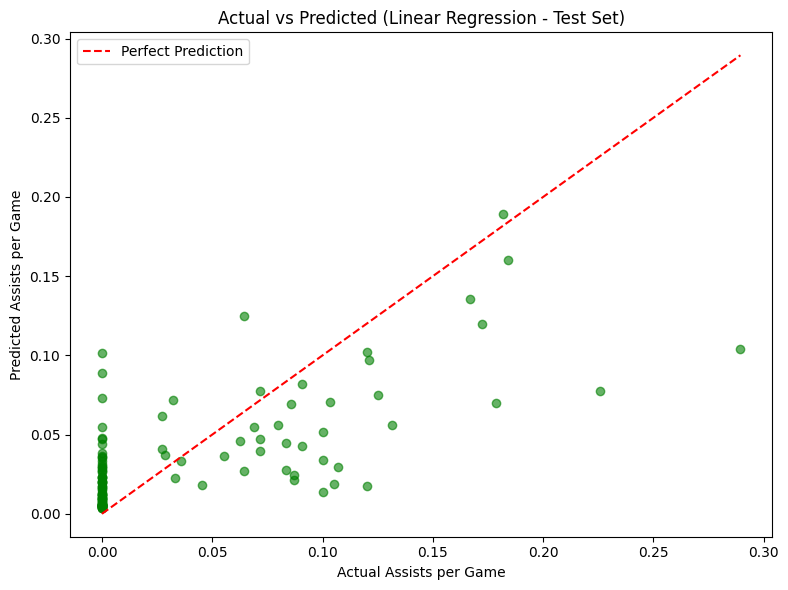

R² Train: 0.3557
R² Test: 0.4782


In [ ]:
# ----------------------------
# 🤖 Linear Regression Model
# ----------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ----------------------------
# 📈 Predict & Evaluate
# ----------------------------
y_train_pred = model.predict(X_train_scaled)
y_test_pred  = model.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2  = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("🎯 Linear Regression Results")
print(f"Train MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Test  MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# ----------------------------
# 📊 Feature Coefficients
# ----------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n📊 Coefficients:")
print(coef_df)

# ----------------------------
# 📉 Visualization: Actual vs Predicted
# ----------------------------

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Linear Regression - Test Set)")
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()


# ----------------------------
# 🧩 ตรวจสอบ Overfitting (เพิ่มเติม)
# ----------------------------
print(f"R² Train: {model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test: {model.score(X_test_scaled, y_test):.4f}")

In [ ]:
# ----------------------------
# 🔮 Prediction for New Player
# ----------------------------
new_player = pd.DataFrame({
    'Goals': [10],
    'Shots': [50],
    'Appearances': [38],
    'Dispossessed': [200],
    'Minutes': [3000]
})

new_player_scaled = scaler.transform(new_player)
predicted_apg = model.predict(new_player_scaled)

print("🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:")
print(f"Predicted Assists per Game: {predicted_apg[0]:.4f}")

if predicted_apg[0] == 0:
    print("ไม่สามารถตีความได้ (ค่าเฉลี่ย 0 แอสซิสต์ต่อเกม)")
else:
    games_per_assist = round(1 / predicted_apg[0], 2)
    print(f"เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ {games_per_assist} เกม")

🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:
Predicted Assists per Game: 0.3078
เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 3.25 เกม


#Ridge Model

In [ ]:
# --------------------------------------
# 📦 Import Libraries
# --------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------------
# 🧹 Data Preprocessing (เหมือนต้นแบบ)
# --------------------------------------

# 1. เลือกเฉพาะคอลัมน์ที่ใช้ในโมเดล
selected_cols = ['Goals','Shots','Assists','Minutes', 'Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# 2. แยก Features และ Target
X = df_model[['Goals','Shots','Assists','Minutes','Appearances','Dispossessed']]
y = df_model['Assists_per_Game']

# 3. แบ่ง Train/Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardization (สำคัญมากสำหรับ Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🎯 Ridge Regression Results
MAE: 0.0097
MSE: 0.0002
R² Score: 0.9451

📊 Ridge Coefficients:
        Feature  Coefficient
0         Goals    -0.001420
1         Shots     0.000181
2       Assists     0.070859
3       Minutes    -0.009173
4   Appearances     0.006046
5  Dispossessed    -0.001860


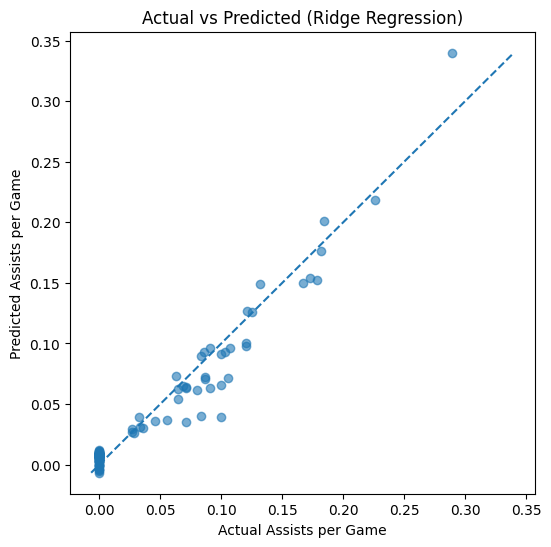

R² Train: 0.9347
R² Test:  0.9451


In [ ]:
# --------------------------------------
# 🧠 Ridge Regression Model
# --------------------------------------

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# ทำนาย
ridge_pred = ridge_model.predict(X_test_scaled)

# --------------------------------------
# 📊 Evaluation
# --------------------------------------

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("🎯 Ridge Regression Results")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"R² Score: {ridge_r2:.4f}")

# Coefficients
ridge_coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_model.coef_
})

print("\n📊 Ridge Coefficients:")
print(ridge_coef_df)

# --------------------------------------
# 📈 Actual vs Predicted Plot
# --------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_pred, alpha=0.6)
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Ridge Regression)")

min_val = min(y_test.min(), ridge_pred.min())
max_val = max(y_test.max(), ridge_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.show()

# --------------------------------------
# 📝 Train/Test R² Score (ถูกต้อง)
# --------------------------------------
print(f"R² Train: {ridge_model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test:  {ridge_model.score(X_test_scaled, y_test):.4f}")

In [ ]:
# ----------------------------
# 🔮 Prediction for New Player
# ----------------------------
new_player = pd.DataFrame({
    'Goals': [21],
    'Shots': [80],
    'Assists': [8],
    'Minutes': [3000],
    'Appearances': [38],
    'Dispossessed': [200]
})

# Scaling using the same scaler used in training
new_player_scaled = scaler.transform(new_player)

# ใช้ ridge_model
predicted_apg = ridge_model.predict(new_player_scaled)

print("🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:")
print(f"Predicted Assists per Game: {predicted_apg[0]:.4f}")

# อธิบายผลลัพธ์เพิ่มเติม
if predicted_apg[0] == 0:
    print("ไม่สามารถตีความได้ (ค่าเฉลี่ย 0 แอสซิสต์ต่อเกม)")
else:
    games_per_assist = round(1 / predicted_apg[0], 2)
    print(f"เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ {games_per_assist} เกม")

🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:
Predicted Assists per Game: 0.2179
เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 4.59 เกม


datapre process ridge ไม่มีassists

In [ ]:
# --------------------------------------
# 📦 Import Libraries
# --------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------------
# 🧹 Data Preprocessing (เหมือนต้นแบบ)
# --------------------------------------

# 1. เลือกเฉพาะคอลัมน์ที่ใช้ในโมเดล
selected_cols = ['Goals','Shots','Minutes', 'Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# 2. แยก Features และ Target
X = df_model[['Goals','Shots','Minutes','Appearances','Dispossessed']]
y = df_model['Assists_per_Game']

# 3. แบ่ง Train/Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardization (สำคัญมากสำหรับ Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🎯 Ridge Regression Results
MAE: 0.0291
MSE: 0.0018
R² Score: 0.4781

📊 Ridge Coefficients:
        Feature  Coefficient
0         Goals     0.001853
1         Shots     0.022157
2       Minutes     0.005135
3   Appearances    -0.003570
4  Dispossessed     0.019782


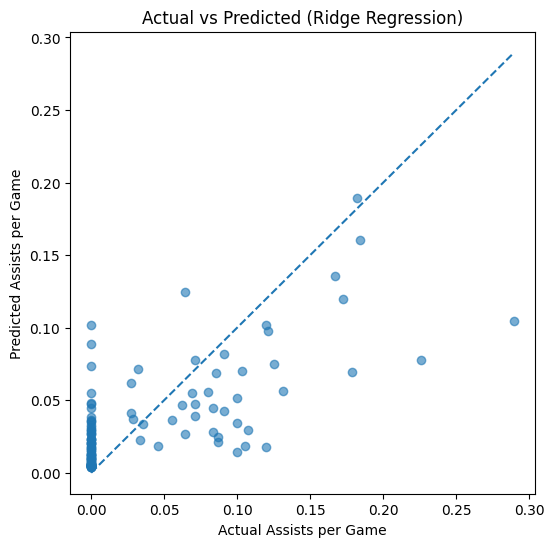

R² Train: 0.3557
R² Test:  0.4781


In [ ]:
# --------------------------------------
# 🧠 Ridge Regression Model
# --------------------------------------

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# ทำนาย
ridge_pred = ridge_model.predict(X_test_scaled)

# --------------------------------------
# 📊 Evaluation
# --------------------------------------

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("🎯 Ridge Regression Results")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"R² Score: {ridge_r2:.4f}")

# Coefficients
ridge_coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_model.coef_
})

print("\n📊 Ridge Coefficients:")
print(ridge_coef_df)

# --------------------------------------
# 📈 Actual vs Predicted Plot
# --------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_pred, alpha=0.6)
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Ridge Regression)")

min_val = min(y_test.min(), ridge_pred.min())
max_val = max(y_test.max(), ridge_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.show()

# --------------------------------------
# 📝 Train/Test R² Score (ถูกต้อง)
# --------------------------------------
print(f"R² Train: {ridge_model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test:  {ridge_model.score(X_test_scaled, y_test):.4f}")

In [ ]:
# ----------------------------
# 🔮 Prediction for New Player (แก้ไขแล้ว)
# ----------------------------
new_player = pd.DataFrame({
    'Goals': [21],
    'Shots': [80],
    'Minutes': [3000],
    'Appearances': [38],
    'Dispossessed': [200]
})

# ต้อง scale ก่อน predict
new_player_scaled = scaler.transform(new_player)

# ใช้ ridge_model ไม่ใช่ model
predicted_apg = ridge_model.predict(new_player_scaled)

print("🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:")
print(f"Predicted Assists per Game: {predicted_apg[0]:.4f}")

if predicted_apg[0] == 0:
    print("ไม่สามารถตีความได้ (ค่าเฉลี่ย 0 แอสซิสต์ต่อเกม)")
else:
    games_per_assist = round(1 / predicted_apg[0], 2)
    print(f"เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ {games_per_assist} เกม")

🔮 ผลการพยากรณ์ Assists ต่อเกม สำหรับผู้เล่นใหม่:
Predicted Assists per Game: 0.3424
เฉลี่ยทำแอสซิสต์ 1 ครั้งในทุก ๆ 2.92 เกม


#lasso

In [ ]:
# --------------------------------------
# 📦 Import Libraries
# --------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------------
# 🧹 Data Preprocessing
# --------------------------------------

selected_cols = ['Goals','Shots','Assists','Minutes','Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# 2. Features + Target
X = df_model[['Goals','Shots','Assists','Minutes','Appearances','Dispossessed']]
y = df_model['Assists_per_Game']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🎯 Lasso Regression Results (With Assists)
MAE: 0.0094
MSE: 0.0002
R² Score: 0.9445

📊 Lasso Coefficients:
        Feature  Coefficient
0         Goals    -0.000035
1         Shots    -0.000000
2       Assists     0.068345
3       Minutes    -0.003010
4   Appearances    -0.000000
5  Dispossessed    -0.000000


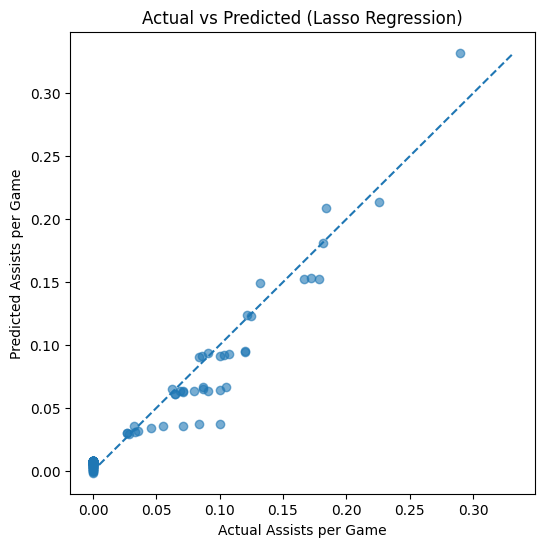

R² Train: 0.9324
R² Test:  0.9445


In [ ]:
# --------------------------------------
# 🧠 Lasso Regression
# --------------------------------------
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

# Predict
lasso_pred = lasso_model.predict(X_test_scaled)

# --------------------------------------
# 📊 Evaluation
# --------------------------------------
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("🎯 Lasso Regression Results (With Assists)")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"R² Score: {lasso_r2:.4f}")

# Coefficients
lasso_coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_model.coef_
})
print("\n📊 Lasso Coefficients:")
print(lasso_coef_df)

# --------------------------------------
# 📈 Plot
# --------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, lasso_pred, alpha=0.6)
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Lasso Regression)")

min_val = min(y_test.min(), lasso_pred.min())
max_val = max(y_test.max(), lasso_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.show()

print(f"R² Train: {lasso_model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test:  {lasso_model.score(X_test_scaled, y_test):.4f}")

In [ ]:
# ----------------------------
# 🔮 Prediction for New Player using Lasso (with Assists feature)
# ----------------------------

# ตัวอย่างข้อมูลผู้เล่นใหม่ (แก้ค่าได้ตามต้องการ)
new_player = pd.DataFrame({
    'Goals': [21],
    'Shots': [80],
    'Assists': [8],
    'Minutes': [3000],
    'Appearances': [38],
    'Dispossessed': [200]
})

# 1) Scale ข้อมูล (ถ้าโมเดลใช้ scaler ตอน train)
new_player_scaled = scaler.transform(new_player)

# 2) Predict ด้วยโมเดล Lasso
predicted_apg_lasso = lasso_model.predict(new_player_scaled)

print("🔮 Lasso Prediction for New Player:")
print(f"Predicted Assists per Game (APG): {predicted_apg_lasso[0]:.4f}")

# 3) แปลผลเชิงความหมาย
if predicted_apg_lasso[0] <= 0:
    print("📌 โมเดลประเมินว่า ผู้เล่นคนนี้มีโอกาสทำแอสซิสต์ต่ำมากหรือแทบจะไม่มีเลย")
else:
    games_per_assist = round(1 / predicted_apg_lasso[0], 2)
    print(f"📌 คาดว่าโดยเฉลี่ยผู้เล่นจะทำ 1 แอสซิสต์ทุก ๆ {games_per_assist} เกม")


🔮 Lasso Prediction for New Player:
Predicted Assists per Game (APG): 0.2404
📌 คาดว่าโดยเฉลี่ยผู้เล่นจะทำ 1 แอสซิสต์ทุก ๆ 4.16 เกม


In [ ]:
# --------------------------------------
# 🧹 Data Preprocessing
# --------------------------------------

selected_cols = ['Goals','Shots','Minutes','Assists_per_Game','Appearances','Dispossessed']
df_model = df[selected_cols].copy()

# 2. Features + Target
X = df_model[['Goals','Shots','Minutes','Appearances','Dispossessed']]
y = df_model['Assists_per_Game']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🎯 Lasso Regression Results (No Assists)
MAE: 0.0295
MSE: 0.0018
R² Score: 0.4747

📊 Lasso Coefficients:
        Feature  Coefficient
0         Goals     0.001221
1         Shots     0.022245
2       Minutes     0.001599
3   Appearances     0.000000
4  Dispossessed     0.018842


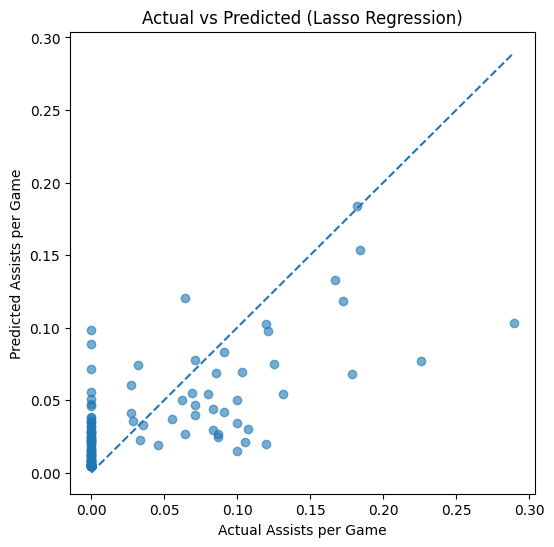

R² Train: 0.3551
R² Test:  0.4747


In [ ]:
# --------------------------------------
# 🧠 Lasso Regression
# --------------------------------------
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

# Predict
lasso_pred = lasso_model.predict(X_test_scaled)

# --------------------------------------
# 📊 Evaluation
# --------------------------------------
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("🎯 Lasso Regression Results (No Assists)")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"R² Score: {lasso_r2:.4f}")

# Coefficients
lasso_coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_model.coef_
})
print("\n📊 Lasso Coefficients:")
print(lasso_coef_df)

# --------------------------------------
# 📈 Plot
# --------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, lasso_pred, alpha=0.6)
plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted (Lasso Regression)")

min_val = min(y_test.min(), lasso_pred.min())
max_val = max(y_test.max(), lasso_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.show()

print(f"R² Train: {lasso_model.score(X_train_scaled, y_train):.4f}")
print(f"R² Test:  {lasso_model.score(X_test_scaled, y_test):.4f}")

In [ ]:
# ----------------------------
# 🔮 Prediction for New Player using Lasso
# ----------------------------

# ตัวอย่างข้อมูลผู้เล่นใหม่ (แก้ค่าตามที่ต้องการ)
new_player = pd.DataFrame({
    'Goals': [21],
    'Shots': [80],
    'Minutes': [3000],
    'Appearances': [38],
    'Dispossessed': [200]
})

# 1) ถ้าโมเดล Lasso เดิมถูก train แบบใช้ scaler
new_player_scaled = scaler.transform(new_player)

# 2) ทำนายด้วยโมเดล Lasso
predicted_apg_lasso = lasso_model.predict(new_player_scaled)

print("🔮 Lasso Prediction for New Player:")
print(f"Predicted Assists per Game (APG): {predicted_apg_lasso[0]:.4f}")

# 3) แปลผลเชิงความหมาย
if predicted_apg_lasso[0] <= 0:
    print("📌 โมเดลประเมินว่า ผู้เล่นคนนี้มีโอกาสทำแอสซิสต์ต่ำมากหรือแทบจะไม่มีเลย")
else:
    games_per_assist = round(1 / predicted_apg_lasso[0], 2)
    print(f"📌 คาดว่าโดยเฉลี่ยผู้เล่นจะทำ 1 แอสซิสต์ทุก ๆ {games_per_assist} เกม")


🔮 Lasso Prediction for New Player:
Predicted Assists per Game (APG): 0.3277
📌 คาดว่าโดยเฉลี่ยผู้เล่นจะทำ 1 แอสซิสต์ทุก ๆ 3.05 เกม


#เปรียบเทียบ


🎯 Linear Regression (With Assists)
R²: 0.9450
📊 Coefficients:
        Feature  Coefficient
0         Goals    -0.001435
1         Shots     0.000101
2       Assists     0.071149
3       Minutes    -0.009451
4   Appearances     0.006317
5  Dispossessed    -0.001983
--------------------------------------------------
🎯 Ridge Regression (With Assists)
R²: 0.9451
📊 Coefficients:
        Feature  Coefficient
0         Goals    -0.001420
1         Shots     0.000181
2       Assists     0.070859
3       Minutes    -0.009173
4   Appearances     0.006046
5  Dispossessed    -0.001860
--------------------------------------------------
🎯 Lasso Regression (With Assists)
R²: 0.9445
📊 Coefficients:
        Feature  Coefficient
0         Goals    -0.000035
1         Shots    -0.000000
2       Assists     0.068345
3       Minutes    -0.003010
4   Appearances    -0.000000
5  Dispossessed    -0.000000
--------------------------------------------------
🎯 Linear Regression (Without Assists)
R²: 0.4782
📊 Coe

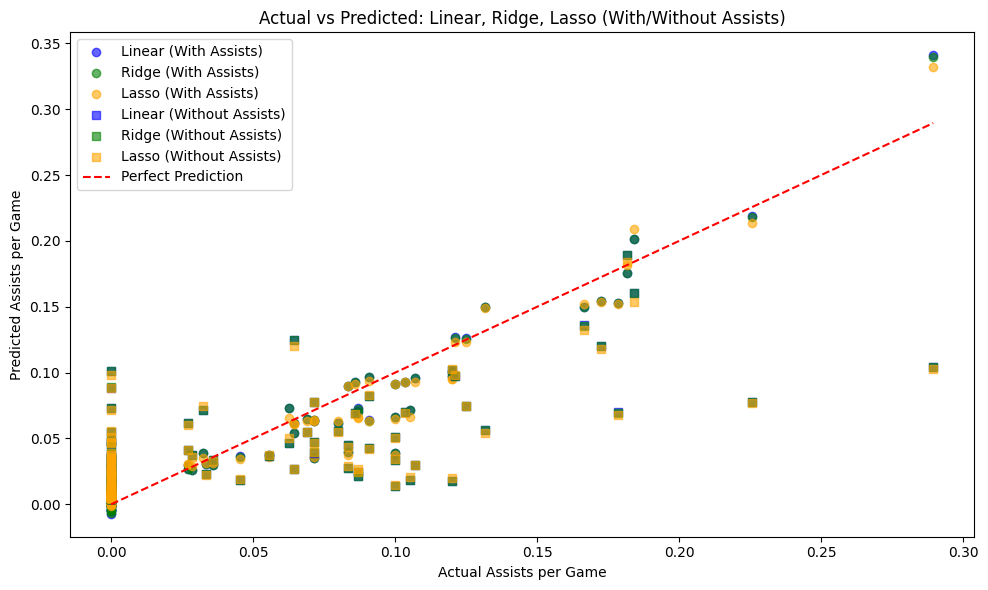

In [ ]:
# ----------------------------
# 📦 Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# 🧹 Feature Sets
# ----------------------------
feature_sets = {
    "With Assists": ['Goals','Shots','Assists','Minutes','Appearances','Dispossessed'],
    "Without Assists": ['Goals','Shots','Minutes','Appearances','Dispossessed']
}

# ----------------------------
# 🧩 Loop Through Feature Sets
# ----------------------------
results = {}  # เก็บ prediction และ R²

for set_name, features in feature_sets.items():
    X = df[features]
    y = df['Assists_per_Game']

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models
    models = {
        "Linear": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.001)
    }

    results[set_name] = {}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)

        # เก็บผลลัพธ์
        results[set_name][name] = {
            "y_pred": y_pred,
            "r2": r2,
            "model": model
        }

        print(f"🎯 {name} Regression ({set_name})")
        print(f"R²: {r2:.4f}")
        coef_df = pd.DataFrame({
            "Feature": features,
            "Coefficient": model.coef_
        })
        print("📊 Coefficients:")
        print(coef_df)
        print("-"*50)

# ----------------------------
# 📈 Visualization: Actual vs Predicted
# ----------------------------
plt.figure(figsize=(10,6))

colors = {
    "Linear": "blue",
    "Ridge": "green",
    "Lasso": "orange"
}

markers = {
    "With Assists": "o",
    "Without Assists": "s"
}

for set_name in feature_sets.keys():
    for model_name in ["Linear", "Ridge", "Lasso"]:
        y_pred = results[set_name][model_name]["y_pred"]
        plt.scatter(
            y_test, y_pred,
            alpha=0.6,
            label=f"{model_name} ({set_name})",
            color=colors[model_name],
            marker=markers[set_name]
        )

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Assists per Game")
plt.ylabel("Predicted Assists per Game")
plt.title("Actual vs Predicted: Linear, Ridge, Lasso (With/Without Assists)")
plt.legend()
plt.tight_layout()
plt.show()


   Actual_Value  Predicted_Value
0          0.00         0.002557
1          0.00         0.007034
2          0.00         0.011579
3          0.00         0.007263
4          0.00        -0.000618
5          0.00         0.009070
6          0.00        -0.003489
7          0.12         0.097676
8          0.00         0.009673
9          0.00         0.011124


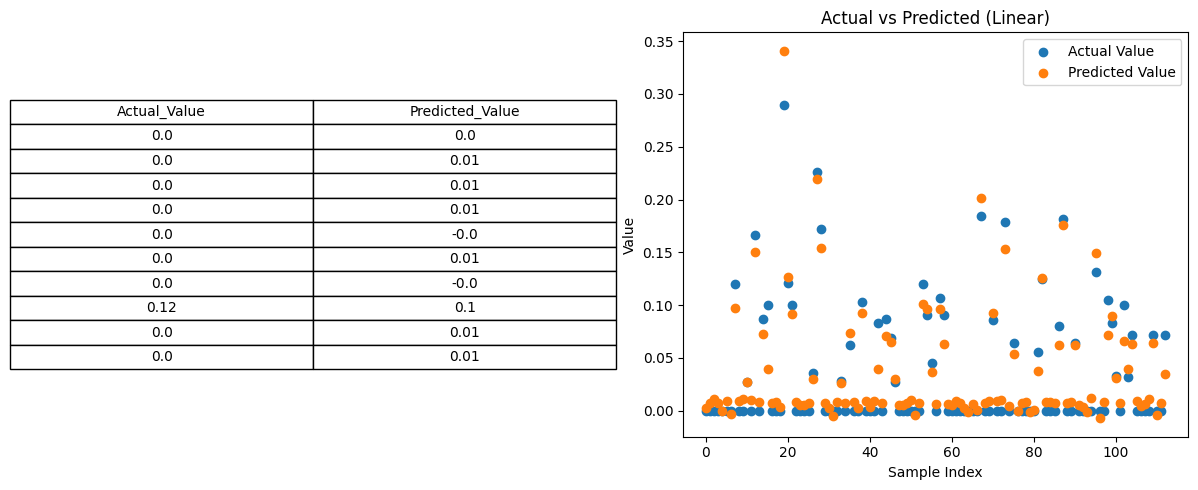

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "With Assists" # เลือกโมเดล Without Assists or With Assists
best_model = "Linear" # เลือกโมเดล (Linear, Ridge, Lasso)

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted ({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

   Actual_Value  Predicted_Value
0          0.00         0.047232
1          0.00         0.004739
2          0.00         0.015652
3          0.00         0.005753
4          0.00         0.008497
5          0.00         0.047858
6          0.00         0.035832
7          0.12         0.102311
8          0.00         0.004091
9          0.00         0.009588


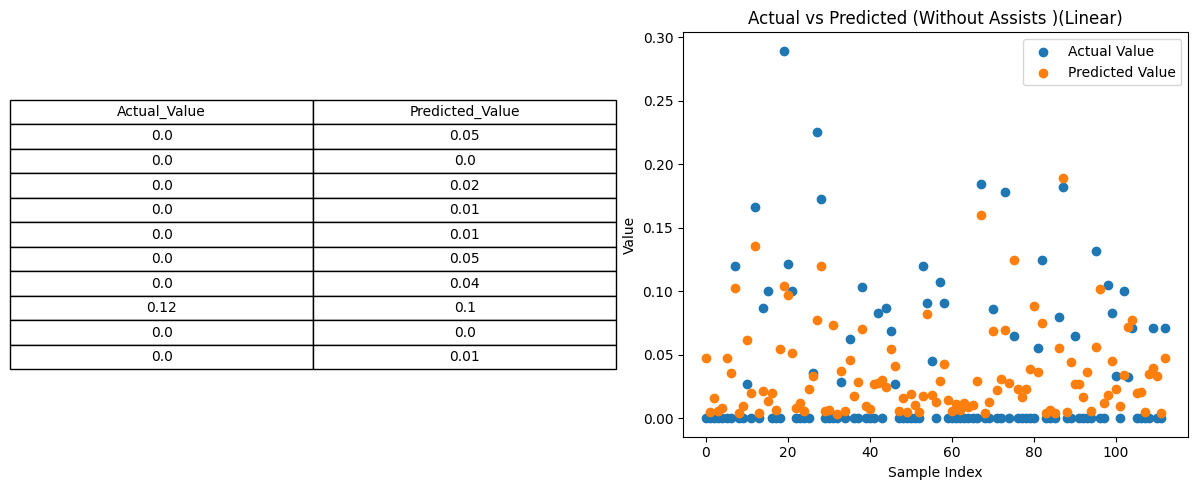

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "Without Assists"
best_model = "Linear"

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted (Without Assists )({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

   Actual_Value  Predicted_Value
0          0.00         0.002795
1          0.00         0.007095
2          0.00         0.011391
3          0.00         0.007315
4          0.00        -0.000504
5          0.00         0.009026
6          0.00        -0.003257
7          0.12         0.097615
8          0.00         0.009613
9          0.00         0.011016


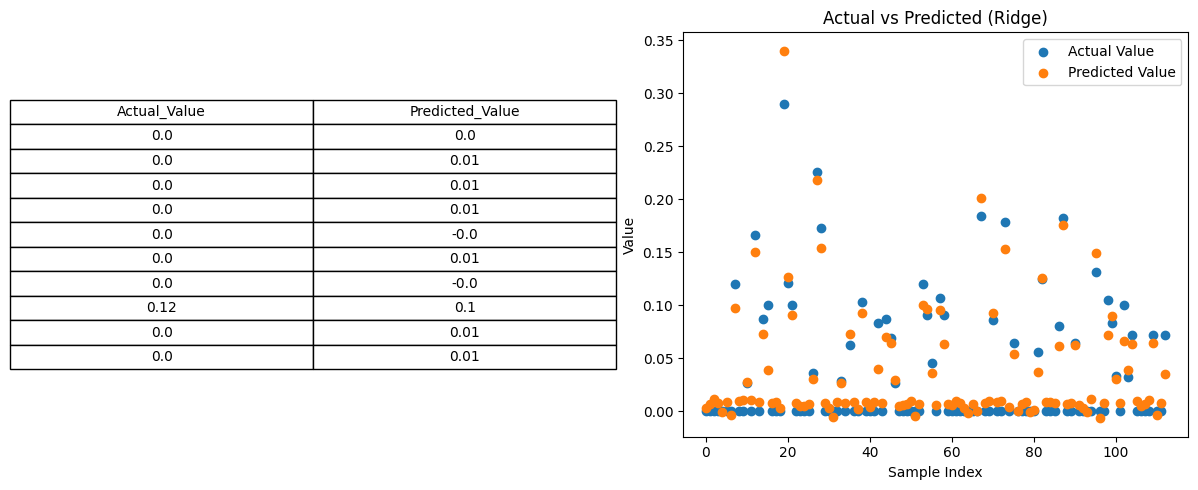

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "With Assists"
best_model = "Ridge" # เลือกโมเดล (Linear, Ridge, Lasso)

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted ({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

   Actual_Value  Predicted_Value
0          0.00         0.047133
1          0.00         0.004675
2          0.00         0.015837
3          0.00         0.005701
4          0.00         0.008554
5          0.00         0.048003
6          0.00         0.035788
7          0.12         0.102151
8          0.00         0.004123
9          0.00         0.009658


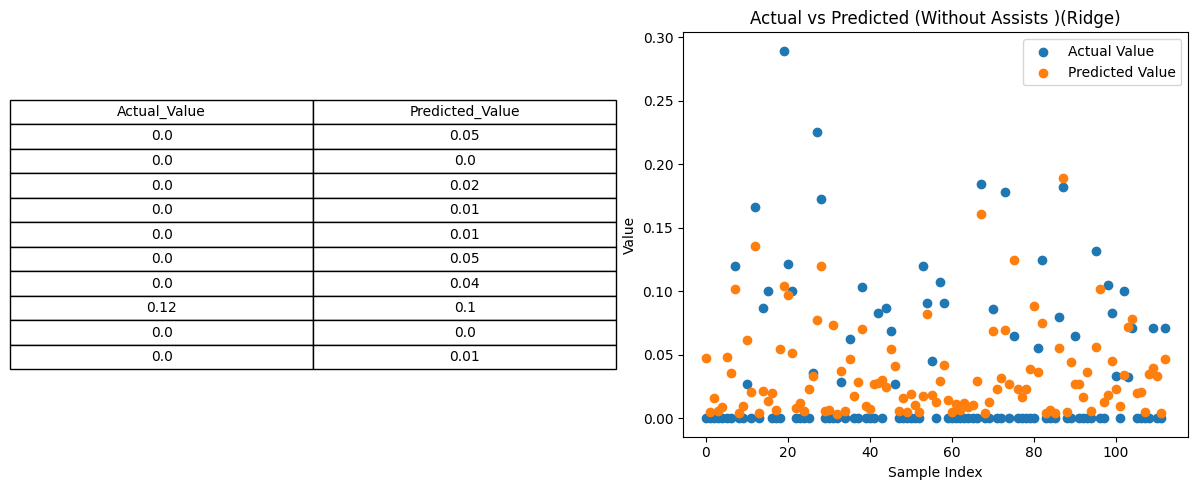

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "Without Assists"
best_model = "Ridge"

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted (Without Assists )({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

   Actual_Value  Predicted_Value
0          0.00         0.005609
1          0.00         0.008182
2          0.00         0.005987
3          0.00         0.008131
4          0.00         0.001672
5          0.00         0.005604
6          0.00        -0.000582
7          0.12         0.095225
8          0.00         0.007881
9          0.00         0.007805


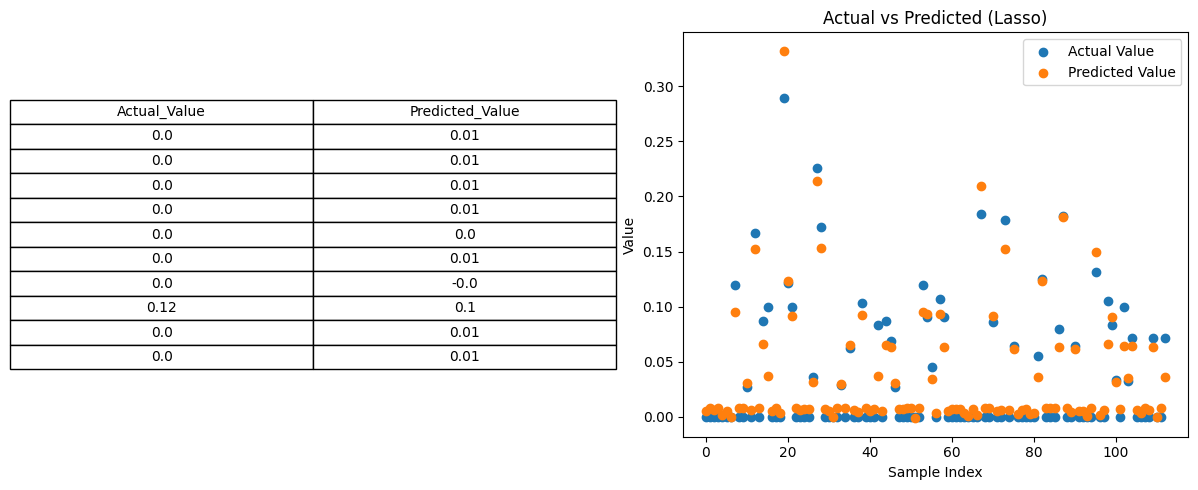

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "With Assists"
best_model = "Lasso"

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted ({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

   Actual_Value  Predicted_Value
0          0.00         0.046225
1          0.00         0.004462
2          0.00         0.019595
3          0.00         0.005660
4          0.00         0.007920
5          0.00         0.050850
6          0.00         0.034958
7          0.12         0.102590
8          0.00         0.005584
9          0.00         0.012022


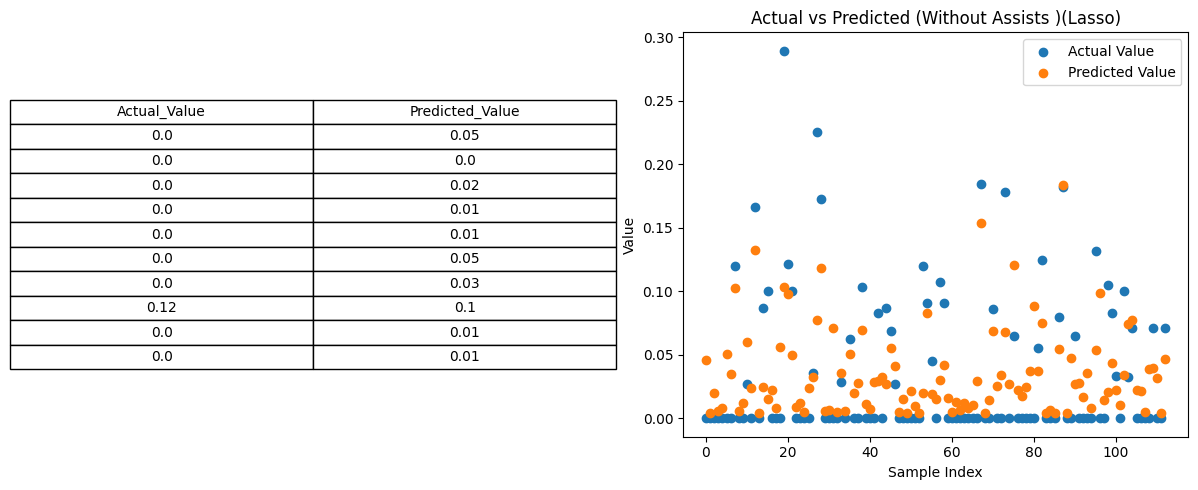

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# สร้างตารางสรุป Actual vs Predicted (เลือกโมเดลที่ดีที่สุดของคุณ)
# ----------------------------
best_set = "Without Assists"
best_model = "Lasso"

y_pred = results[best_set][best_model]["y_pred"]

df_compare = pd.DataFrame({
    "Actual_Value": y_test.values,
    "Predicted_Value": y_pred
})

# เลือกแค่ 10 แถว
df_show = df_compare.head(10)

print(df_show)

# ----------------------------
# วาดกราฟ Scatter แบบเคียงกับตาราง
# ----------------------------
plt.figure(figsize=(12,5))

# --- Left side: Table ---
plt.subplot(1, 2, 1)
plt.axis("off")
table = plt.table(
    cellText=df_show.round(2).values,
    colLabels=df_show.columns,
    loc="center",
    cellLoc="center"
)
table.scale(1.2, 1.4)

# --- Right: Scatter ---
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_compare)), df_compare["Actual_Value"], label="Actual Value")
plt.scatter(range(len(df_compare)), df_compare["Predicted_Value"], label="Predicted Value")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted (Without Assists )({best_model})")
plt.legend()

plt.tight_layout()
plt.show()

# Summary

เมื่อมีฟีเจอร์ Assists โมเดลสามารถทำนายได้แม่นยำมาก (R² ≈ 0.945) โดย Assists เป็นตัวอธิบายผลลัพธ์สำคัญที่สุด ส่วนเมื่อไม่มี Assists ความแม่นยำลดลงอย่างหนัก (R² ≈ 0.47) และฟีเจอร์อื่นแทบไม่ช่วยทำนาย ทำให้สรุปได้ว่า Assists เป็นตัวแปรหลักที่จำเป็นต่อการทำนายค่า assists ต่อเกม และ Ridge/Lasso ไม่ได้ให้ผลต่างจาก Linear อย่างมีนัย เพราะข้อมูลไม่ได้มีปัญหา overfitting ชัดเจน.

# ข้อมูลและการเตรียมข้อมูล

* โหลดชุดข้อมูล epl_player_stats_24_25.csv จาก Google Drive
* ตรวจสอบโครงสร้างข้อมูล, head/info/describe, ค่าที่หายไป และแถวซ้ำ
   * ผลตรวจ: ไม่พบ missing values/duplicates
* แปลงคอลัมน์ที่เป็นเปอร์เซ็นต์จากสตริงเป็นตัวเลข, แก้ชื่อสโมสรให้สอดคล้อง (เช่น Brighton → Brighton & Hove Albion)
* ตรวจค่าผิดปกติกรณี Appearances=0 แต่ Assists>0
* สร้างฟีเจอร์ใหม่ Assists_per_Game (APG = Assists/Appearances หาก Appearances>0), สร้าง Z-score และธง Outlier, คอลัมน์อธิบาย APG เป็นภาษาธรรมชาติ
* บันทึกไฟล์ที่ผ่านการประมวลผล epl_player_stats_24_25_processed.csv

# การวิเคราะห์เชิงสำรวจ (EDA)

* การกระจายตัว: Histogram/Boxplot ของ Appearances, Assists, และ APG พบว่า APG เบ้ขวา ผู้เล่นส่วนใหญ่ทำแอสซิสต์น้อยหรือศูนย์
* Top performers: จัดอันดับผู้เล่นตาม Assists และตาม APG
* ความสัมพันธ์สำคัญ: Scatter/Regression ระหว่าง Minutes–Assists, Successful Passes–Assists
* Heatmap ความสัมพันธ์ของฟีเจอร์เชิงตัวเลข และ pairplot กลุ่มตัวชี้วัดเกมรุก
* วิเคราะห์ตามสัญชาติ: นับจำนวน, ค่าเฉลี่ย APG ต่อสัญชาติ, เปรียบเทียบด้วย ANOVA ระหว่างบางสัญชาติหลัก

# การสร้างmodel

* สร้าง 2 ชุดฟีเจอร์
  1.   With Assists: Goals, Shots, Assists, Minutes, Appearances, Dispossessed
  2.   Without Assists: Goals, Shots, Minutes, Appearances, Dispossessed
* แบ่งข้อมูล Train/Test = 80/20 และทำ Standardization ด้วย StandardScaler
* โมเดลที่ใช้: Linear Regression, Ridge (alpha=1.0), Lasso (alpha≈0.001)
* ประเมินผลด้วย MAE, MSE, R² และกราฟ Actual vs Predicted; รายงานค่าสัมประสิทธิ์ของแต่ละฟีเจอร์
* ทำตัวอย่างพยากรณ์ผู้เล่นใหม่สำหรับแต่ละโมเดล

# ผลลัพธ์

* ชุดฟีเจอร์ With Assists ให้ผลแม่นยำกว่าอย่างชัดเจนในกราฟ Actual vs Predicted แต่มีความเสี่ยง data leakage เพราะเป้าหมาย APG = Assists/Appearances
* เมื่อตัด Assists ออก ประสิทธิภาพลดลงและมีแนวโน้มทำนายต่ำกว่าค่าจริงในกรณี APG สูง
* ทั้ง Linear, Ridge, Lasso ให้ผลใกล้เคียงกันเมื่อใส่ Assists; Ridge มีความเสถียรเล็กน้อย
* ปัจจัยที่สัมพันธ์กับการทำแอสซิสต์/ค่า APG เด่น: Shots, Goals, Minutes/Appearances, Dispossessed และ Successful Passes
* ยังคงมีความคลาดเคลื่อนที่ปลายช่วงค่าจริงสูง สื่อว่าความแม่นยำยังระดับปานกลาง

# สรุปภาพรวม

* ได้ทำความสะอาดและสำรวจข้อมูลครบถ้วน สร้างฟีเจอร์ APG และอินไซต์เชิงเกมรุก
* สร้างและเปรียบเทียบโมเดล Linear, Ridge, Lasso ทั้งแบบมี/ไม่มีฟีเจอร์ Assists
* ผลชี้ว่าโมเดลมีแนวโน้มทำงานได้ดีขึ้นเมื่อมีสัญญาณจากเกมรุกและเวลาลงเล่น แต่ต้องระวังการรั่วไหลของข้อมูลและควรพัฒนาต่อด้วยการจูนและโมเดลขั้นสูงเพื่อความแม่นยำและความน่าเชื่อถือที่สูงขึ้นในการใช้งานจริง

* กราฟของโมเดลอาจดูไม่ดี เพราะ ข้อมูลจริง (Target) กระจุกอยู่ที่ศูนย์
แม้ทำนายค่าพุ่งไม่แม่น แต่แค่ทำนายค่าศูนย์ถูกบ่อย ๆ ก็ทำให้ R² สูงได้แล้ว
ดังนั้น กราฟไม่น่าดู ≠ โมเดลไม่ดีเสมอไป ต้องพิจารณาทั้งโครงสร้างข้อมูลและ metric เช่น R² ควบคู่กัน